# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [13]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [14]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/My Drive/EDA/AssignmentData/trip_records')


# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_month_df = pd.read_parquet(file_path)

         # Convert 'tpep_pickup_datetime' to datetime objects
        current_month_df['tpep_pickup_datetime'] = pd.to_datetime(current_month_df['tpep_pickup_datetime'])




        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()


        # Extract date and hour
        current_month_df['pickup_date'] = current_month_df['tpep_pickup_datetime'].dt.date
        current_month_df['pickup_hour'] = current_month_df['tpep_pickup_datetime'].dt.hour

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date
        for date in current_month_df['pickup_date'].unique():
            date_data = current_month_df[current_month_df['pickup_date'] == date]
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]


                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df =  pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('taxi_data_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df=pd.read_parquet('taxi_data_2023.parquet')


In [ ]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee  pickup_date  pickup_hour airport_fee  
1788             0.0   2023-12-01            0         NaN  
3196699          NaN   2023-12-01            0         NaN  
1408             0.0   2023-12-01            0         NaN  
3196663          NaN   2023-12-01            0         NaN  
3613             0.0   2023-12-01            0         NaN  

[5 rows x 22 columns]

In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2042850 entries, 1788 to 2820817
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

# Display the first few rows to see the new index
print("DataFrame after resetting index:")
df.head()

# Dropping columns that might not be needed for analysis
# Based on the Data Description and typical analysis, 'store_and_fwd_flag' and the extracted date/hour columns might be redundant
# as we have the original datetime column.
columns_to_drop = ['store_and_fwd_flag', 'pickup_date', 'pickup_hour']

# Check if columns exist before dropping to avoid errors
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print(f"\nDropped columns: {existing_columns_to_drop}")
else:
    print("\nNo specified columns to drop were found in the DataFrame.")


# Display info after dropping columns to confirm
print("\nDataFrame info after dropping columns:")
df.info()

DataFrame after resetting index:

Dropped columns: ['store_and_fwd_flag', 'pickup_date', 'pickup_hour']

DataFrame info after dropping columns:
<class 'pandas.core.frame.DataFrame'>
Index: 2042850 entries, 1788 to 2820817
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amo

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns


# Check if both columns exist in the DataFrame
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    print("Both 'airport_fee' and 'Airport_fee' columns found. Combining them.")

    # Create a new combined column by adding the values from both,
    # filling any potential NaN values with 0 so that the sum is calculated correctly
    df['combined_airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

    # Optionally, drop the original two columns after creating the combined one
    df = df.drop(columns=['airport_fee', 'Airport_fee'])
    print("Combined 'airport_fee' and 'Airport_fee' into 'combined_airport_fee' and dropped original columns.")

elif 'airport_fee' in df.columns:
    print("Only 'airport_fee' column found. No combination needed.")
    # You might want to rename this column to a more descriptive name if desired, e.g., 'combined_airport_fee'
    # df = df.rename(columns={'airport_fee': 'combined_airport_fee'})
    # print("Renamed 'airport_fee' to 'combined_airport_fee'.")

elif 'Airport_fee' in df.columns:
    print("Only 'Airport_fee' column found. No combination needed.")
    # You might want to rename this column to a more descriptive name
    # df = df.rename(columns={'Airport_fee': 'combined_airport_fee'})
    # print("Renamed 'Airport_fee' to 'combined_airport_fee'.")

else:
    print("Neither 'airport_fee' nor 'Airport_fee' columns found.")

# Display info after potential combination to see the new column and confirm old ones are dropped
df.info()

Both 'airport_fee' and 'Airport_fee' columns found. Combining them.
Combined 'airport_fee' and 'Airport_fee' into 'combined_airport_fee' and dropped original columns.
<class 'pandas.core.frame.DataFrame'>
Index: 2042850 entries, 1788 to 2820817
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float6

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:


# check where values of fare amount are negative
# Filter the DataFrame to show rows where 'fare_amount' is less than 0
negative_fare_rows = df[df['fare_amount'] < 0]

# Display the rows with negative fare amounts
print("Rows with negative 'fare_amount':")
print(negative_fare_rows)

# Optionally, you can also print the number of such rows
print(f"\nNumber of rows with negative 'fare_amount': {negative_fare_rows.shape[0]}")

Rows with negative 'fare_amount':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

Number of rows with negative 'fare_amount': 0


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

if not negative_fare_rows.empty:
    print("\nAnalyzing RatecodeID for trips with negative fare amounts:")

    # Get the value counts for the 'RatecodeID' column in the filtered DataFrame
    ratecode_counts = negative_fare_rows['RatecodeID'].value_counts()

    # Display the counts of each RatecodeID for these negative fare trips
    print("RatecodeID distribution for trips with negative fare:")
    print(ratecode_counts)

    # Optionally, you can also look at the proportion
    ratecode_proportions = negative_fare_rows['RatecodeID'].value_counts(normalize=True)
    print("\nRatecodeID proportion for trips with negative fare:")
    print(ratecode_proportions)

    # You might also want to see the unique RatecodeIDs present
    unique_ratecodes = negative_fare_rows['RatecodeID'].unique()
    print(f"\nUnique RatecodeIDs in trips with negative fare: {unique_ratecodes}")

else:
    print("\nNo rows with negative fare amounts found to analyze RatecodeID.")


No rows with negative fare amounts found to analyze RatecodeID.


In [ ]:
# Find which columns have negative values
numerical_cols = df.select_dtypes(include=np.number).columns

# Initialize an empty dictionary to store columns with negative values and the number of negative values
negative_value_counts = {}

# Iterate through each numerical column
for col in numerical_cols:
    # Check if there are any values less than 0 in the current column
    negative_values = df[df[col] < 0]

    # If there are negative values, store the count
    if not negative_values.empty:
        negative_value_counts[col] = negative_values.shape[0]

# Print the columns that have negative values and the count of negative values in each
if negative_value_counts:
    print("Columns with negative values and the count of negative values:")
    for col, count in negative_value_counts.items():
        print(f"- {col}: {count} negative values")
else:
    print("No numerical columns found with negative values.")


Columns with negative values and the count of negative values:
- extra: 3 negative values
- mta_tax: 73 negative values
- improvement_surcharge: 78 negative values
- total_amount: 78 negative values
- congestion_surcharge: 56 negative values
- combined_airport_fee: 15 negative values


In [ ]:
# fix these negative values

print("Before fixing negative values:")
print(df.describe()) # Show summary statistics including minimum values


monetary_distance_cols = [
    'fare_amount',
    'trip_distance',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'combined_airport_fee' # Use the combined column name if you created it
]

# Filter out rows where any of these columns have a negative value
# We'll use a boolean mask
mask = pd.Series(True, index=df.index) # Start with a mask of all True
for col in monetary_distance_cols:
    if col in df.columns: # Check if the column exists
        mask = mask & (df[col] >= 0) # Keep rows where the value is >= 0

initial_rows = df.shape[0]
df = df[mask].copy() # Apply the mask and create a copy to avoid SettingWithCopyWarning
rows_dropped = initial_rows - df.shape[0]
print(f"\nDropped {rows_dropped} rows with negative values in monetary or distance columns.")

Before fixing negative values:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.042850e+06                     2042850                     2042850   
mean   1.735024e+00  2023-07-01 19:23:02.149350  2023-07-01 19:40:23.036649   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 23:54:25  2023-04-02 00:11:49.500000   
50%    2.000000e+00         2023-06-24 23:33:56         2023-06-24 23:50:14   
75%    2.000000e+00         2023-10-05 10:37:25  2023-10-05 10:55:20.750000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.462184e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.972605e+06   2.042850e+06  1.972605e+06  2.042850e+06   
mean      1.372348e+00   3.886432e+00  1.606821e+00  1.645717e+02   
min       0.000000e+00   0.000000e+00  1.000000e+0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missing_values_count = df.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the proportion of missing values for each column
missing_values_proportion = missing_values_count / total_rows

# Display the proportion of missing values.
# We can sort them in descending order to see which columns have the most missing values.
print("Proportion of missing values in each column:")
print(missing_values_proportion.sort_values(ascending=False))

Proportion of missing values in each column:
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
combined_airport_fee     0.0
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
print("Rows with null values in 'passenger_count':")
print(df[df['passenger_count'].isnull()])
# Impute NaN values in 'passenger_count'
passenger_count_missing_proportion = df['passenger_count'].isnull().sum() / df.shape[0]
print(f"\nProportion of missing values in 'passenger_count': {passenger_count_missing_proportion:.4f}")



# Let's look at the distribution of 'passenger_count' for non-missing values to decide.
print("\nValue counts for 'passenger_count' (excluding NaNs):")
print(df['passenger_count'].value_counts(dropna=True))


passenger_count_mode = df['passenger_count'].mode()[0]
print(f"\nMode of 'passenger_count': {passenger_count_mode}")

# Fill missing values in 'passenger_count' with the calculated mode
df['passenger_count'].fillna(passenger_count_mode, inplace=True)

print("\nDataFrame info after imputing 'passenger_count':")
df.info()

# Verify that there are no more missing values in 'passenger_count'
print(f"\nMissing values in 'passenger_count' after imputation: {df['passenger_count'].isnull().sum()}")


Rows with null values in 'passenger_count':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

Proportion of missing values in 'passenger_count': 0.0000

Value counts for 'passenger_count' (excluding NaNs):
passenger_count
1.0    1479477
2.0     301788
3.0      75166
4.0      41825
0.0      31420
5.0      26011
6.0      16818
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

Mode of 'passenger_count': 1.0

DataFrame info after imputing 'passenger_count':
<class 'pandas.core.frame.DataFrame'>
Index: 1972526 entries, 1788 to 2820817
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup

/tmp/ipython-input-38-1664422591.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(passenger_count_mode, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

# Check the proportion of missing values in 'RatecodeID'
ratecode_missing_proportion = df['RatecodeID'].isnull().sum() / df.shape[0]
print(f"Proportion of missing values in 'RatecodeID': {ratecode_missing_proportion:.4f}")

# Display rows with null values in 'RatecodeID' to get a sense of the context
print("\nRows with null values in 'RatecodeID':")
print(df[df['RatecodeID'].isnull()])

# Analyze the distribution of non-missing RatecodeID values
print("\nValue counts for 'RatecodeID' (excluding NaNs):")
print(df['RatecodeID'].value_counts(dropna=True))


ratecode_mode = df['RatecodeID'].mode()[0]
print(f"\nMode of 'RatecodeID': {ratecode_mode}")

# Impute missing values in 'RatecodeID' with the calculated mode
df['RatecodeID'].fillna(ratecode_mode, inplace=True)

print("\nDataFrame info after imputing 'RatecodeID':")
df.info()

# Verify that there are no more missing values in 'RatecodeID'
print(f"\nMissing values in 'RatecodeID' after imputation: {df['RatecodeID'].isnull().sum()}")


Proportion of missing values in 'RatecodeID': 0.0000

Rows with null values in 'RatecodeID':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

Value counts for 'RatecodeID' (excluding NaNs):
RatecodeID
1.0     1861531
2.0       78424
5.0       11319
99.0      10692
3.0        6224
4.0        4333
6.0           3
Name: count, dtype: int64

Mode of 'RatecodeID': 1.0

DataFrame info after imputing 'RatecodeID':
<class 'pandas.core.frame.DataFrame'>
Index: 1972526 entries, 1788 to 2820817
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us

/tmp/ipython-input-39-2610444418.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(ratecode_mode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

# Check the proportion of missing values in 'congestion_surcharge'
congestion_surcharge_missing_proportion = df['congestion_surcharge'].isnull().sum() / df.shape[0]
print(f"Proportion of missing values in 'congestion_surcharge': {congestion_surcharge_missing_proportion:.4f}")

# Display rows with null values in 'congestion_surcharge'
print("\nRows with null values in 'congestion_surcharge':")
print(df[df['congestion_surcharge'].isnull()])

# Analyze the distribution of non-missing 'congestion_surcharge' values
# Since this is a monetary amount, value_counts might be less informative than describe or value counts for specific values.
print("\nDescription of 'congestion_surcharge' (excluding NaNs):")
print(df['congestion_surcharge'].dropna().describe())

print("\nValue counts for 'congestion_surcharge' (excluding NaNs):")
print(df['congestion_surcharge'].value_counts(dropna=True))


df['congestion_surcharge'].fillna(0, inplace=True)

print("\nDataFrame info after imputing 'congestion_surcharge':")
df.info()

# Verify that there are no more missing values in 'congestion_surcharge'
print(f"\nMissing values in 'congestion_surcharge' after imputation: {df['congestion_surcharge'].isnull().sum()}")

# Check the value counts again to see if 0 is now present and its count
print("\nValue counts for 'congestion_surcharge' after imputation:")
print(df['congestion_surcharge'].value_counts(dropna=False)) # Use dropna=False to include the count of 0s




Proportion of missing values in 'congestion_surcharge': 0.0000

Rows with null values in 'congestion_surcharge':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, combined_airport_fee]
Index: []

Description of 'congestion_surcharge' (excluding NaNs):
count    1.972526e+06
mean     2.302089e+00
std      6.749877e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

Value counts for 'congestion_surcharge' (excluding NaNs):
congestion_surcharge
2.5    1816372
0.0     156153
0.5          1
Name: count, dtype: int64

DataFrame info after imputing 'congestion_surcharge':
<class 'pandas.core.frame.DataFrame'>
Index: 1972526 entries, 1788 to 2820817
Data columns (

/tmp/ipython-input-40-2832940027.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:


# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print("Descriptive Statistics of the DataFrame:")

print(df.describe())

print("\nDescriptive Statistics for Categorical/Object Columns:")

print(df.describe(include='all')) # Using include='all' includes all column types


# Check for potential outliers or anomalies in specific columns based on expected ranges or typical values.

print("\nChecking for potential outliers in specific columns:")


# Trip Distance
# Maximum distance seems very high compared to the median/mean.
print(f"\nValue counts for trip_distance > 250 miles:")
print(df[df['trip_distance'] > 250].shape[0]) # Count trips with exceptionally long distances

# Fare Amount
# Maximum fare amount seems very high. Also check for very low or unusual fares.
print(f"\nValue counts for fare_amount > 500:")
print(df[df['fare_amount'] > 500].shape[0])

# Total Amount
# Maximum total amount also seems very high.
print(f"\nValue counts for total_amount > 600:")
print(df[df['total_amount'] > 600].shape[0])


# Passenger Count
# Check for unusually high passenger counts (e.g., > 6, which is unlikely for a standard taxi)
# Assuming you handled negative and zero passenger counts earlier.
print(f"\nValue counts for passenger_count > 6:")
print(df[df['passenger_count'] > 6].shape[0])
print(f"Value counts for passenger_count:\n{df['passenger_count'].value_counts().sort_index()}")


# RatecodeID
# Check if there are any RatecodeIDs outside the expected range (1-6)
print(f"\nValue counts for RatecodeID:")
print(df['RatecodeID'].value_counts().sort_index())
print(f"Unique RatecodeIDs outside 1-6: {df[~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]['RatecodeID'].unique()}")

# Payment Type
# Check if there are any Payment_types outside the expected range (1-6)
print(f"\nValue counts for payment_type:")
print(df['payment_type'].value_counts().sort_index())
print(f"Unique payment_types outside 1-6: {df[~df['payment_type'].isin([1, 2, 3, 4, 5, 6])]['payment_type'].unique()}")


# Relationships between columns can also reveal outliers:
# Example: Very short distance with very high fare, or vice versa.
print("\nChecking for relationship-based potential outliers:")
# Trips with very short distance but very high fare
print(f"\nRows with trip_distance < 0.1 and fare_amount > 100:")
short_distance_high_fare = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 100)]
print(short_distance_high_fare.shape[0])
if short_distance_high_fare.shape[0] > 0:
    print(short_distance_high_fare[['trip_distance', 'fare_amount', 'total_amount', 'RatecodeID', 'payment_type']].head())


# Trips with very long distance but very low fare
print(f"\nRows with trip_distance > 50 and fare_amount < 10:")
long_distance_low_fare = df[(df['trip_distance'] > 50) & (df['fare_amount'] < 10)]
print(long_distance_low_fare.shape[0])
if long_distance_low_fare.shape[0] > 0:
    print(long_distance_low_fare[['trip_distance', 'fare_amount', 'total_amount', 'RatecodeID', 'payment_type']].head())




Descriptive Statistics of the DataFrame:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.972526e+06                     1972526                     1972526   
mean   1.738367e+00  2023-06-30 19:26:40.737216  2023-06-30 19:43:57.705983   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 23:07:44         2023-04-01 23:22:47   
50%    2.000000e+00  2023-06-24 11:56:26.500000         2023-06-24 12:13:07   
75%    2.000000e+00  2023-10-03 23:22:13.250000  2023-10-03 23:37:37.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.395239e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.972526e+06   1.972526e+06  1.972526e+06  1.972526e+06   
mean      1.372343e+00   3.604238e+00  1.606825e+00  1.647400e+02   
min       0.000000e+00   0.000000e+00  1

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

# Check the number of rows before removing
initial_rows = df.shape[0]
print(f"Number of rows before removing passenger_count > 6: {initial_rows}")

# Filter the DataFrame to keep only rows where 'passenger_count' is 6 or less
# We assume that a standard taxi cannot carry more than 6 passengers.
df = df[df['passenger_count'] <= 6].copy()

# Calculate the number of rows removed
rows_removed = initial_rows - df.shape[0]
print(f"Number of rows removed with passenger_count > 6: {rows_removed}")
print(f"Number of rows after removing passenger_count > 6: {df.shape[0]}")


# Verify the change by checking the value counts for passenger_count again
print("\nValue counts for 'passenger_count' after removal:")
print(df['passenger_count'].value_counts().sort_index())

# Verify the maximum passenger count
print(f"\nMaximum passenger_count after removal: {df['passenger_count'].max()}")


Number of rows before removing passenger_count > 6: 1972526
Number of rows removed with passenger_count > 6: 21
Number of rows after removing passenger_count > 6: 1972505

Value counts for 'passenger_count' after removal:
passenger_count
0.0      31420
1.0    1479477
2.0     301788
3.0      75166
4.0      41825
5.0      26011
6.0      16818
Name: count, dtype: int64

Maximum passenger_count after removal: 6.0


In [ ]:
# Continue with outlier handling

# Based on the outlier analysis, we identified several potential issues:
# - Entries where trip_distance is nearly 0 and fare_amount is more than 300
# - Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
# - Entries where trip_distance is more than 250 miles.
# - Entries where payment_type is 0 (or other values not in the data dictionary 1-6)

# Let's address these systematically.

# 1. Entries where trip_distance is nearly 0 and fare_amount is more than 300
print("\nChecking for trips with trip_distance near 0 and high fare_amount:")
short_distance_high_fare = df[(df['trip_distance'] < 1) & (df['fare_amount'] > 300)]
print(f"Number of such trips: {short_distance_high_fare.shape[0]}")
# These are highly suspicious and likely data errors. Dropping them is a reasonable approach.
if short_distance_high_fare.shape[0] > 0:
    print("Dropping these trips...")
    initial_rows = df.shape[0]
    df = df.drop(short_distance_high_fare.index).copy()
    rows_dropped = initial_rows - df.shape[0]
    print(f"Dropped {rows_dropped} rows.")


# 2. Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
# Note: We need PULocationID and DOLocationID for this.
# Also, check payment_type for these, as some might be 'No Charge' or 'Voided trip'.
print("\nChecking for trips with 0 distance and 0 fare but different pickup/dropoff zones:")
zero_distance_fare_different_zones = df[(df['trip_distance'] == 0) &
                                        (df['fare_amount'] == 0) &
                                        (df['PULocationID'] != df['DOLocationID'])]
print(f"Number of such trips: {zero_distance_fare_different_zones.shape[0]}")

# Investigate the payment types for these trips
if zero_distance_fare_different_zones.shape[0] > 0:
    print("Payment types for these trips:")
    print(zero_distance_fare_different_zones['payment_type'].value_counts())

# If many of these have payment_type 3 (No Charge) or 6 (Voided trip), they might be legitimate.
# However, if they have payment_type 1 (Credit Card) or 2 (Cash), it's highly suspicious.
# A reasonable approach is to drop these if the payment type is not 'No Charge' or 'Voided trip'.
# Assuming Payment_type 3 and 6 cover legitimate zero fare/distance cases.
trips_to_drop = zero_distance_fare_different_zones[~zero_distance_fare_different_zones['payment_type'].isin([3, 6])]
print(f"Number of suspicious 0 distance/fare trips with invalid payment type: {trips_to_drop.shape[0]}")
if trips_to_drop.shape[0] > 0:
     print("Dropping these suspicious trips...")
     initial_rows = df.shape[0]
     df = df.drop(trips_to_drop.index).copy()
     rows_dropped = initial_rows - df.shape[0]
     print(f"Dropped {rows_dropped} rows.")


# 3. Entries where trip_distance is more than 250 miles.
print("\nChecking for trips with trip_distance > 250 miles:")
long_distance_outliers = df[df['trip_distance'] > 250]
print(f"Number of such trips: {long_distance_outliers.shape[0]}")
# Trips exceeding a very high threshold are likely errors. Dropping is usually the safest.
if long_distance_outliers.shape[0] > 0:
    print("Dropping these long distance outlier trips...")
    initial_rows = df.shape[0]
    df = df.drop(long_distance_outliers.index).copy()
    rows_dropped = initial_rows - df.shape[0]
    print(f"Dropped {rows_dropped} rows.")


# 4. Entries where payment_type is 0 (or other values not in 1-6)
# Assuming you already checked for non-1-6 payment types in the outlier analysis
print("\nChecking for payment_type outliers (not in 1-6):")
payment_type_outliers = df[~df['payment_type'].isin([1, 2, 3, 4, 5, 6])]
print(f"Number of payment_type outliers: {payment_type_outliers.shape[0]}")
# These are invalid entries based on the data dictionary. Dropping is appropriate.
if payment_type_outliers.shape[0] > 0:
    print("Dropping payment_type outlier trips...")
    initial_rows = df.shape[0]
    df = df.drop(payment_type_outliers.index).copy()
    rows_dropped = initial_rows - df.shape[0]
    print(f"Dropped {rows_dropped} rows.")


# Re-run describe to see the impact of outlier removal on statistics
print("\nDataFrame Description after handling more outliers:")
print(df.describe())




Checking for trips with trip_distance near 0 and high fare_amount:
Number of such trips: 38
Dropping these trips...
Dropped 66 rows.

Checking for trips with 0 distance and 0 fare but different pickup/dropoff zones:
Number of such trips: 56
Payment types for these trips:
payment_type
2    25
1    18
4     8
3     5
Name: count, dtype: int64
Number of suspicious 0 distance/fare trips with invalid payment type: 51
Dropping these suspicious trips...
Dropped 83 rows.

Checking for trips with trip_distance > 250 miles:
Number of such trips: 19
Dropping these long distance outlier trips...
Dropped 27 rows.

Checking for payment_type outliers (not in 1-6):
Number of payment_type outliers: 0

DataFrame Description after handling more outliers:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.972329e+06                     1972329                     1972329   
mean   1.738380e+00  2023-06-30 19:25:30.080791  2023-06-30 19:42:47.076167   
min    1.000000e

In [ ]:
# Do any columns need standardising?

print("Checking the scale of numerical columns:")
print(df.describe())

Checking the scale of numerical columns:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.972329e+06                     1972329                     1972329   
mean   1.738380e+00  2023-06-30 19:25:30.080791  2023-06-30 19:42:47.076167   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 23:07:44         2023-04-01 23:22:47   
50%    2.000000e+00         2023-06-24 11:54:32         2023-06-24 12:10:16   
75%    2.000000e+00         2023-10-03 23:21:57         2023-10-03 23:37:24   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.395167e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.972329e+06   1.972329e+06  1.972329e+06  1.972329e+06   
mean      1.372273e+00   3.505178e+00  1.606241e+00  1.647391e+02   
min       0.000000e+00   0.000000e+00  1

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Number of Taxi Pickups by Hour of Day:
pickup_hour
0      51208
1      34528
2      22550
3      14709
4       9437
5      10018
6      24466
7      48987
8      68273
9      78280
10     85626
11     93033
12    100997
13    104099
14    111561
15    114286
16    114272
17    123551
18    129180
19    115912
20    103431
21    103163
22     95155
23    215607
Name: count, dtype: int64


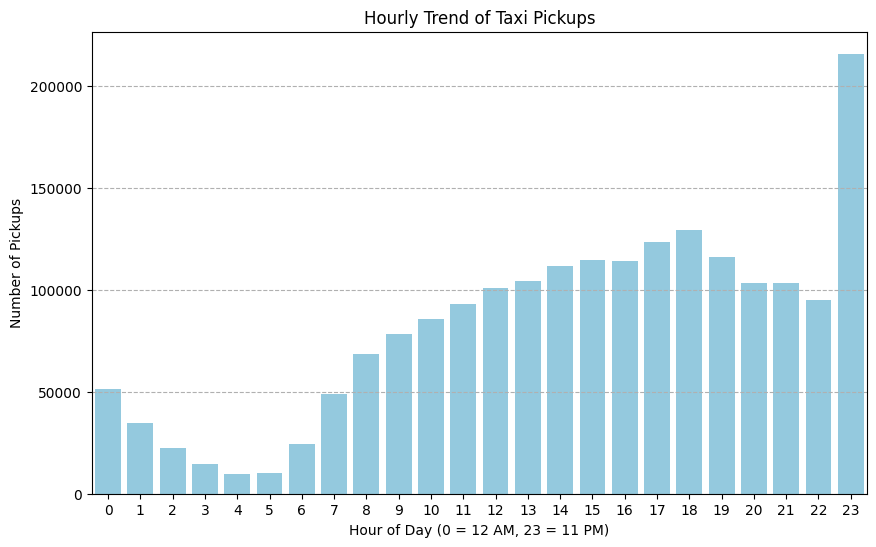

In [ ]:
# Find and show the hourly trends in taxi pickups
# Ensure 'tpep_pickup_datetime' is in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the number of pickups for each hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Print the hourly pickup counts
print("Number of Taxi Pickups by Hour of Day:")
print(hourly_pickups)
# You would typically visualize this using a bar plot or line plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, color='skyblue')
plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of Day (0 = 12 AM, 23 = 11 PM)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24)) # Ensure all hours from 0 to 23 are shown
plt.grid(axis='y', linestyle='--')
plt.show()

Number of Taxi Pickups by Day of Week:
pickup_day_of_week
Monday       246485
Tuesday      282719
Wednesday    307657
Thursday     307250
Friday       288528
Saturday     294654
Sunday       245036
Name: count, dtype: int64


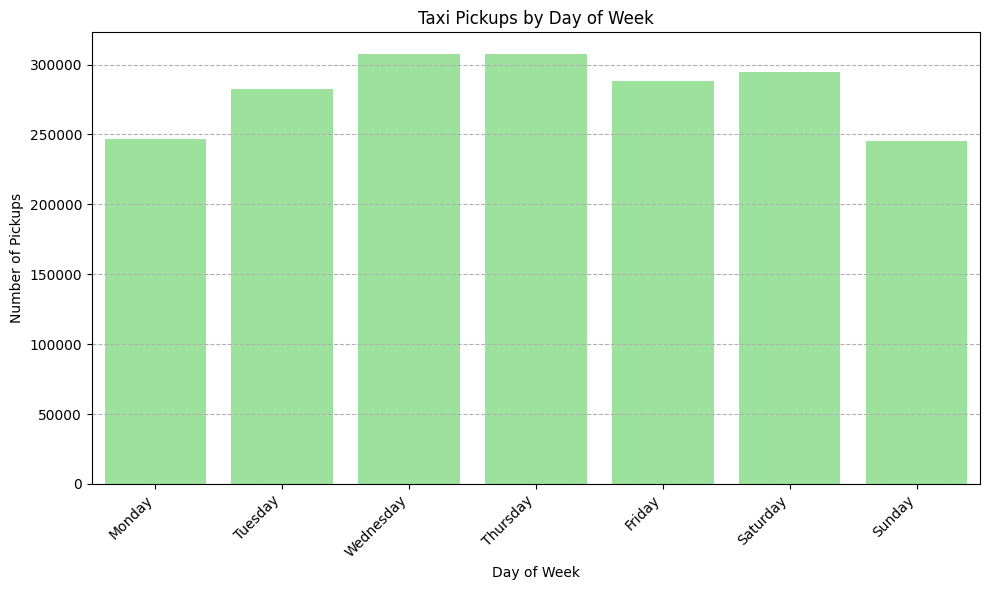

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

# Ensure 'tpep_pickup_datetime' is in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the day of the week from the pickup datetime
# .dt.day_name() returns the name of the day (e.g., 'Monday')
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculate the number of pickups for each day of the week
daily_pickups = df['pickup_day_of_week'].value_counts()

# To ensure the days are displayed in the standard order (Monday to Sunday),
# we can reindex the Series.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups_ordered = daily_pickups.reindex(day_order)


# Print the daily pickup counts
print("Number of Taxi Pickups by Day of Week:")
print(daily_pickups_ordered)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups_ordered.index, y=daily_pickups_ordered.values, color='lightgreen')
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Number of Taxi Pickups by Month:
pickup_month
January      152473
February     150057
March        184401
April        173316
May          190931
June         175144
July         152292
August       144028
September    138726
October      180588
November     161083
December     169290
Name: count, dtype: int64


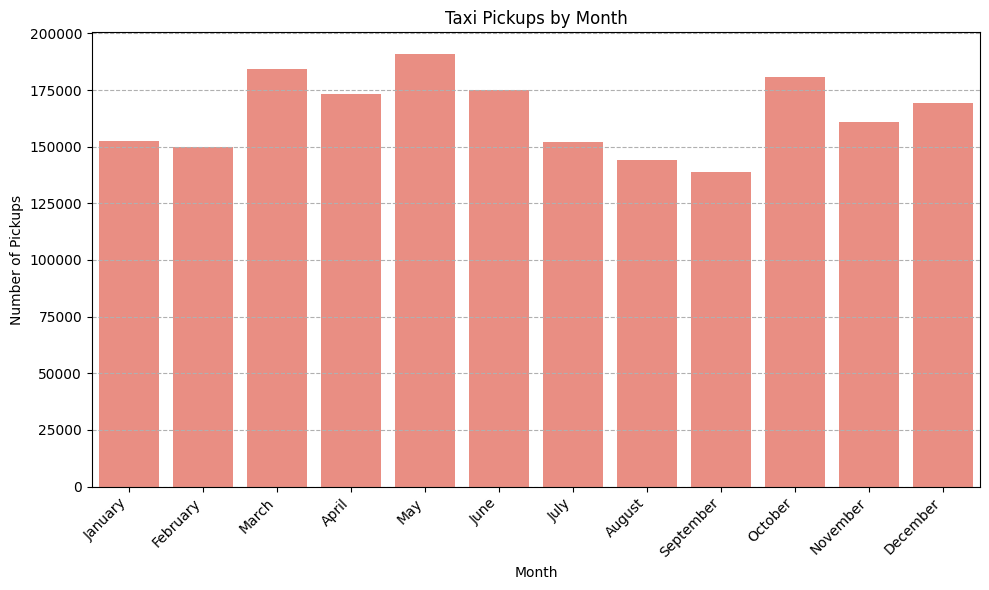

In [ ]:
# Show the monthly trends in pickups


# Ensure 'tpep_pickup_datetime' is in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the month from the pickup datetime
# .dt.month_name() returns the name of the month (e.g., 'January')
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

# Calculate the number of pickups for each month
monthly_pickups = df['pickup_month'].value_counts()

# To ensure the months are displayed in the standard order (January to December),
# we can reindex the Series.
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups_ordered = monthly_pickups.reindex(month_order)

# Print the monthly pickup counts
print("Number of Taxi Pickups by Month:")
print(monthly_pickups_ordered)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups_ordered.index, y=monthly_pickups_ordered.values, color='salmon')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Descriptive Statistics for Key Financial and Distance Columns:
        fare_amount    tip_amount  total_amount  trip_distance         extra  \
count  1.972329e+06  1.972329e+06  1.972329e+06   1.972329e+06  1.972329e+06   
mean   1.988727e+01  3.601675e+00  2.905754e+01   3.505178e+00  1.650763e+00   
std    1.837926e+01  4.088450e+00  2.298742e+01   4.591591e+00  1.823832e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.070000e+00  0.000000e+00   
50%    1.350000e+01  2.860000e+00  2.100000e+01   1.800000e+00  1.000000e+00   
75%    2.190000e+01  4.480000e+00  3.105000e+01   3.460000e+00  2.500000e+00   
max    1.375000e+03  2.230800e+02  1.435190e+03   2.048600e+02  1.425000e+01   

            mta_tax  tolls_amount  improvement_surcharge  \
count  1.972329e+06  1.972329e+06           1.972329e+06   
mean   4.953722e-01  5.968632e-01           9.993384e-01   
std    4.817047e-02  2.180737e+00   

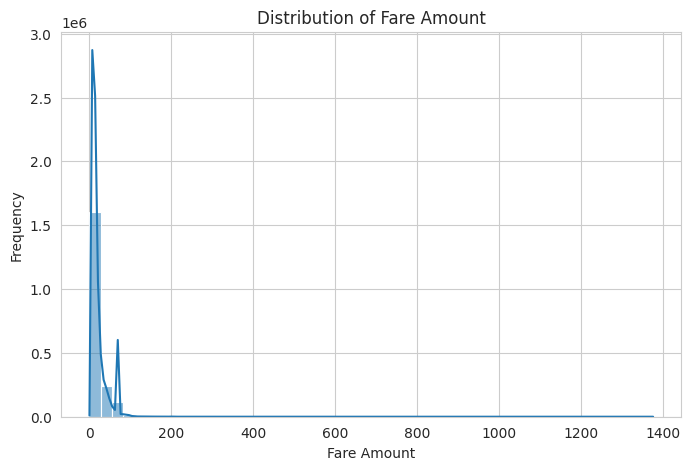

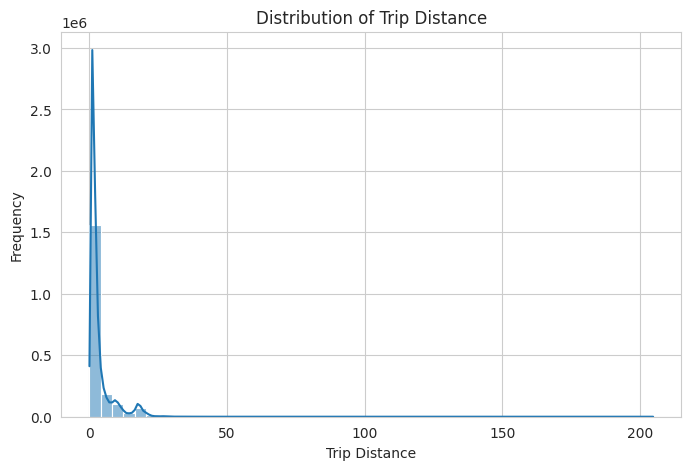

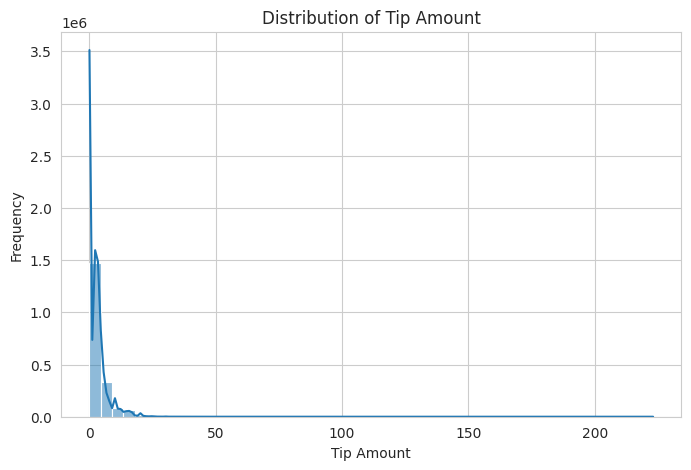

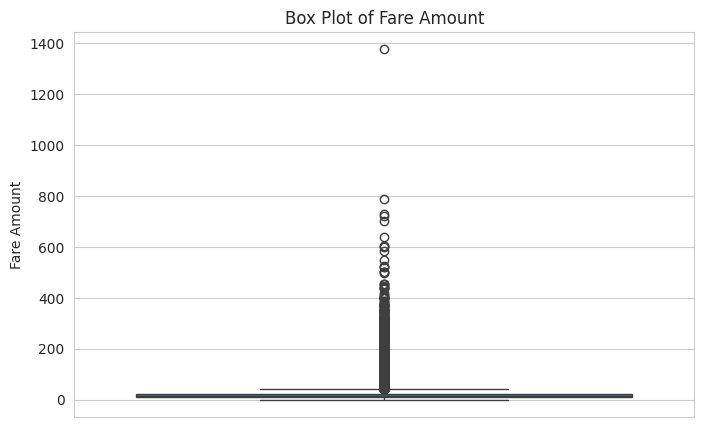

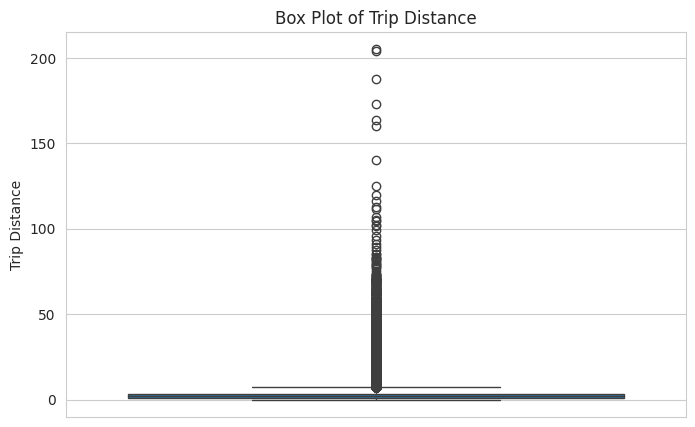

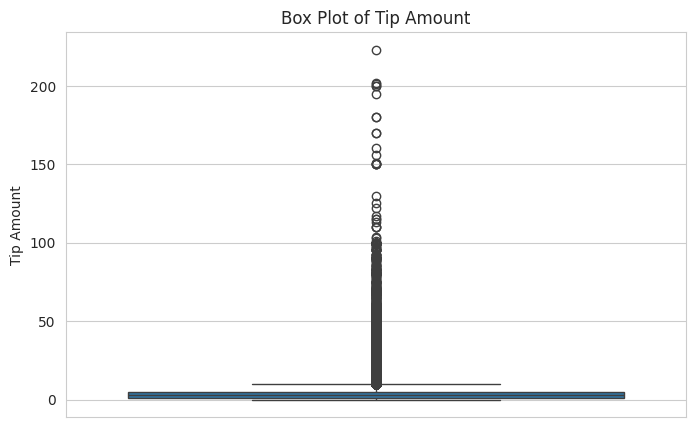


Analyzing relationships (Correlations and Scatter Plots):

Correlation Matrix:
                       fare_amount  tip_amount  total_amount  trip_distance  \
fare_amount               1.000000    0.594296      0.979485       0.912894   
tip_amount                0.594296    1.000000      0.716785       0.574335   
total_amount              0.979485    0.716785      1.000000       0.912150   
trip_distance             0.912894    0.574335      0.912150       1.000000   
extra                     0.143575    0.184847      0.225643       0.176029   
mta_tax                  -0.302788   -0.152775     -0.287370      -0.138304   
tolls_amount              0.628418    0.460574      0.701905       0.645709   
improvement_surcharge    -0.004192    0.007738      0.001637       0.010558   
congestion_surcharge     -0.340462   -0.105172     -0.293909      -0.313135   
combined_airport_fee      0.588479    0.397868      0.619346       0.657193   

                          extra   mta_tax  tolls_a

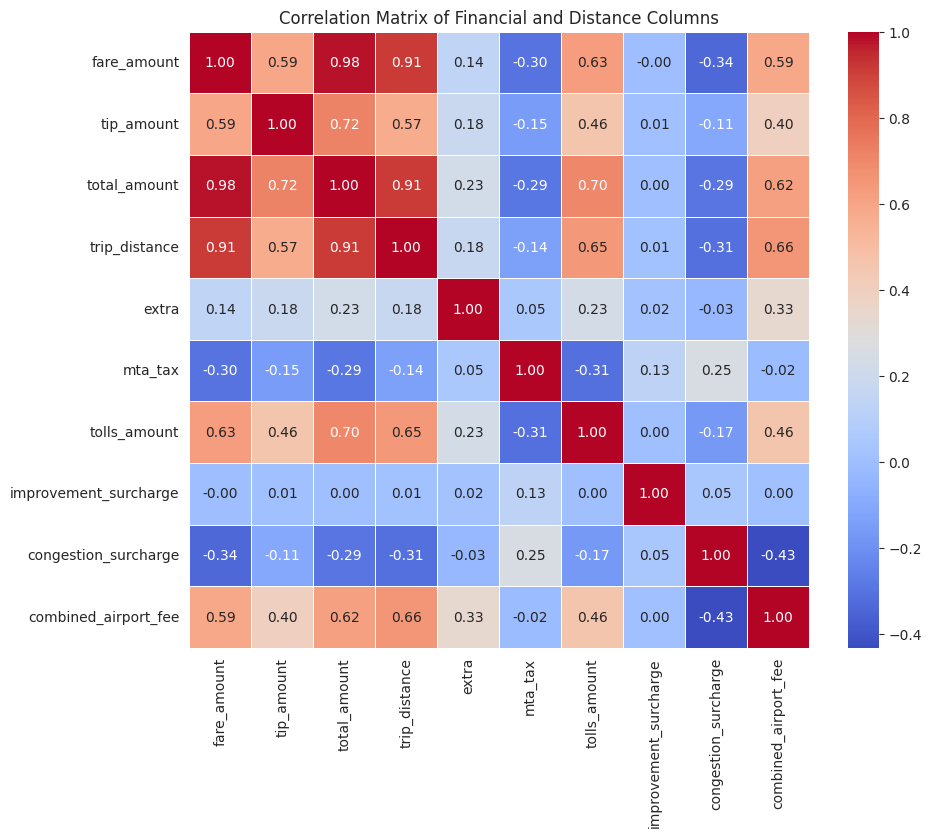

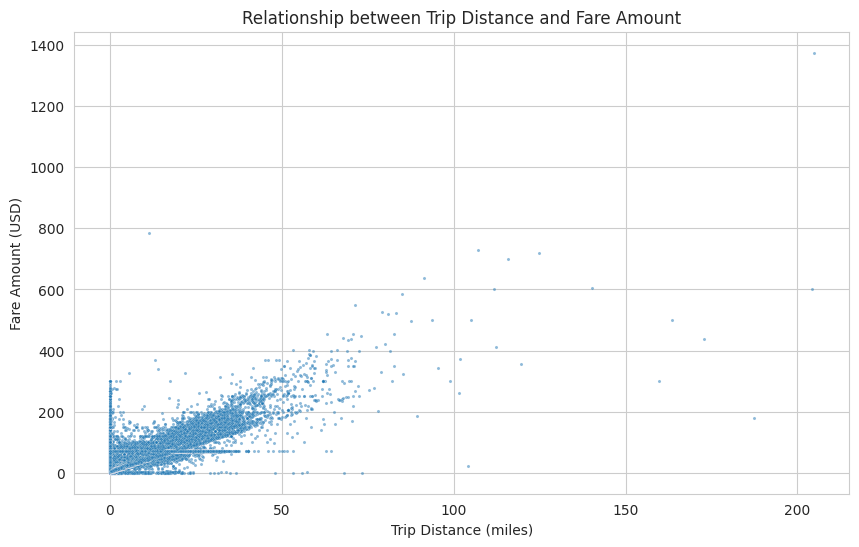

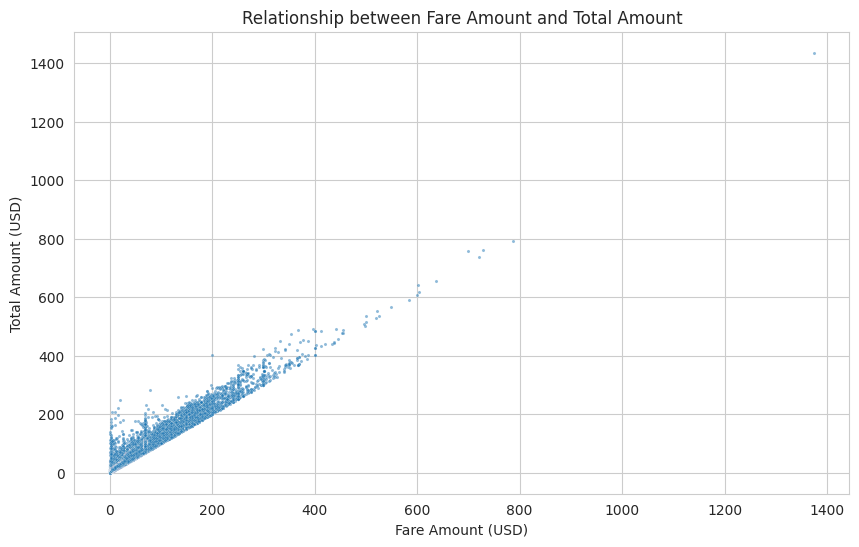

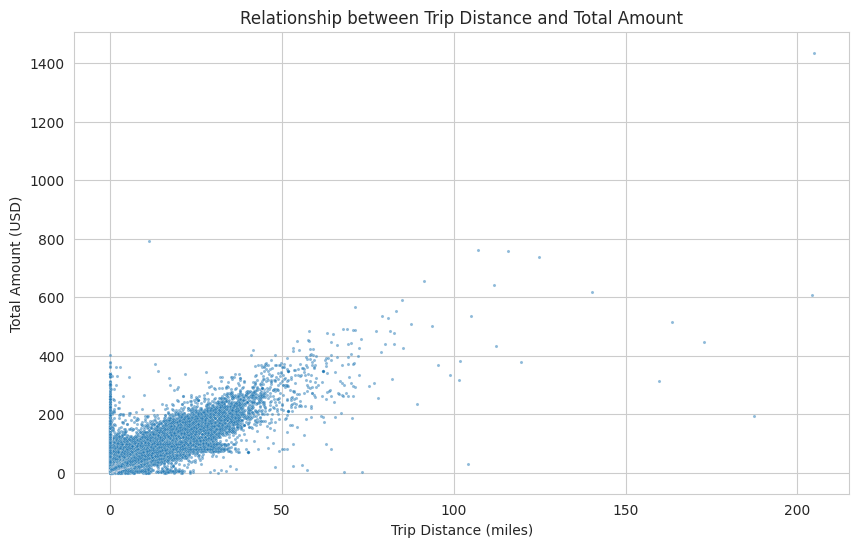


Analyzing components of Total Amount:

Average values of financial/distance components:
fare_amount              19.887274
tip_amount                3.601675
total_amount             29.057540
trip_distance             3.505178
extra                     1.650763
mta_tax                   0.495372
tolls_amount              0.596863
improvement_surcharge     0.999338
congestion_surcharge      2.302209
combined_airport_fee      0.149221
dtype: float64

Descriptive statistics for Tip Percentage (for trips with fare > 0):
count    1.971789e+06
mean     2.028263e+01
std      1.460806e+01
min      0.000000e+00
25%      8.000000e+00
50%      2.393701e+01
75%      2.915493e+01
max      2.000000e+02
Name: tip_percentage, dtype: float64


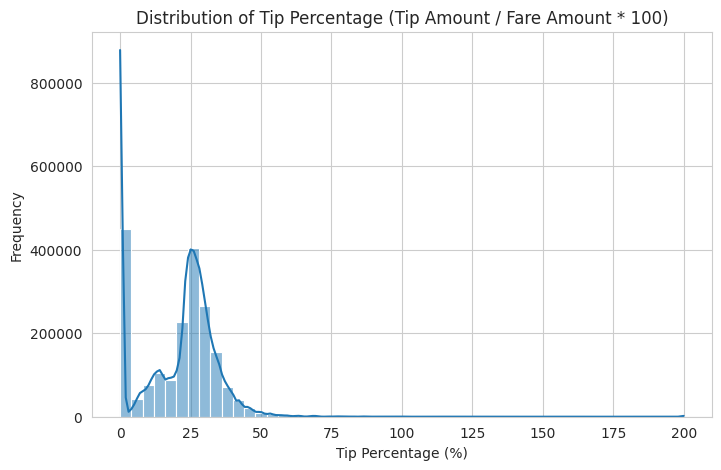

In [ ]:
# Analyse the above parameters (fare_amount, tip_amount, total_amount, trip_distance, and other financial columns)

financial_distance_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance',
                           'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                           'congestion_surcharge']
# Add 'combined_airport_fee' if you created it
if 'combined_airport_fee' in df.columns:
    financial_distance_cols.append('combined_airport_fee')


print("Descriptive Statistics for Key Financial and Distance Columns:")
# Get descriptive statistics for the selected numerical columns
print(df[financial_distance_cols].describe())


print("\nChecking distributions and relationships:")

# Visualizing distributions (histograms or box plots) can reveal skewness and outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
sns.set_style("whitegrid")

# Plot histograms for the key financial/distance columns (excluding total_amount for now as it's a sum)
# Use a loop for multiple plots
cols_to_hist = ['fare_amount', 'trip_distance', 'tip_amount'] # Add others as needed

for col in cols_to_hist:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        # Use a limited number of bins or adjust scale due to potential long tails
        sns.histplot(df[col], bins=50, kde=True) # kde=True adds a kernel density estimate line
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frequency')
        plt.show()

# Plot box plots to visualize potential outliers more clearly
cols_to_boxplot = ['fare_amount', 'trip_distance', 'tip_amount'] # Add others as needed

for col in cols_to_boxplot:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col.replace("_", " ").title()}')
        plt.ylabel(col.replace("_", " ").title())
        plt.show()

# Analyze relationships between key variables
print("\nAnalyzing relationships (Correlations and Scatter Plots):")

# Calculate the correlation matrix for the selected numerical columns
correlation_matrix = df[financial_distance_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Financial and Distance Columns')
plt.show()


# Scatter plots for specific relationships of interest
# Relationship between trip_distance and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5, s=5) # Use smaller points for large datasets
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.show()

# Relationship between total_amount and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='total_amount', data=df, alpha=0.5, s=5)
plt.title('Relationship between Fare Amount and Total Amount')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Total Amount (USD)')
plt.show()

# Relationship between trip_distance and total_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df, alpha=0.5, s=5)
plt.title('Relationship between Trip Distance and Total Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount (USD)')
plt.show()


# Analyze the breakdown of total_amount into its components (fare, tip, tolls, surcharges etc.)
print("\nAnalyzing components of Total Amount:")
# You can calculate the average proportion of each component, or visualize it.
# This requires summing up the components for each trip (which should ideally equal total_amount)
# Note: total_amount includes base fare + extras + MTA tax + tolls + improvement surcharge + congestion surcharge + airport fee + tip (for credit card)

# Let's calculate the average value of each component
average_components = df[financial_distance_cols].mean()
print("\nAverage values of financial/distance components:")
print(average_components)

# You can also look at the distribution of tip percentage (tip_amount / fare_amount)
# Handle potential division by zero if fare_amount is 0
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']).replace([np.inf, -np.inf], np.nan)
# Remove cases where fare_amount was 0 initially to avoid skewing percentage analysis
df_with_fare = df[df['fare_amount'] > 0].copy()
if not df_with_fare.empty:
    df_with_fare['tip_percentage'] = (df_with_fare['tip_amount'] / df_with_fare['fare_amount']) * 100
    # Clean up potential extreme percentages
    df_with_fare['tip_percentage'] = df_with_fare['tip_percentage'].clip(upper=200) # Cap at a reasonable max percentage

    print("\nDescriptive statistics for Tip Percentage (for trips with fare > 0):")
    print(df_with_fare['tip_percentage'].describe())

    plt.figure(figsize=(8, 5))
    sns.histplot(df_with_fare['tip_percentage'].dropna(), bins=50, kde=True)
    plt.title('Distribution of Tip Percentage (Tip Amount / Fare Amount * 100)')
    plt.xlabel('Tip Percentage (%)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\nCannot calculate tip percentage as no trips have a fare amount > 0.")


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Filter out the zero values from the above columns.

cols_to_filter_zeros_from = ['fare_amount', 'total_amount']
# Add 'tip_amount' if you are specifically analyzing tipping patterns.
# cols_to_filter_zeros_from.append('tip_amount')

# Create a boolean mask: True for rows where ALL specified columns are not zero
# Initialize the mask assuming all rows are good to keep initially
mask_non_zero_financial = pd.Series(True, index=df.index)

for col in cols_to_filter_zeros_from:
    if col in df.columns: # Ensure the column exists
        # Update the mask: keep rows where the current column is NOT equal to 0
        mask_non_zero_financial = mask_non_zero_financial & (df[col] != 0)

# Create a new DataFrame containing only the rows that satisfy the mask
df_non_zero_financial = df[mask_non_zero_financial].copy()

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after excluding zero fare_amount and total_amount: {df_non_zero_financial.shape}")




print("\nUsing 'df_non_zero_financial' (excluding zero fare and total amount) for further analysis.")
# You can verify the minimums in this new DataFrame
print(df_non_zero_financial[['fare_amount', 'total_amount', 'trip_distance']].describe())


Original DataFrame shape: (1972329, 22)
DataFrame shape after excluding zero fare_amount and total_amount: (1971789, 22)

Using 'df_non_zero_financial' (excluding zero fare and total amount) for further analysis.
        fare_amount  total_amount  trip_distance
count  1.971789e+06  1.971789e+06   1.971789e+06
mean   1.989272e+01  2.906463e+01   3.505362e+00
std    1.837883e+01  2.298572e+01   4.590425e+00
min    1.000000e-02  1.010000e+00   0.000000e+00
25%    9.300000e+00  1.596000e+01   1.070000e+00
50%    1.350000e+01  2.100000e+01   1.800000e+00
75%    2.190000e+01  3.105000e+01   3.460000e+00
max    1.375000e+03  1.435190e+03   2.048600e+02


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue (Total Amount):
pickup_year_month
2022-12        243.00
2023-01    4206097.58
2023-02    4124609.87
2023-03    5197777.84
2023-04    5066092.37
2023-05    5642502.04
2023-06    5149546.60
2023-07    4484940.84
2023-08    4228785.17
2023-09    4172834.73
2023-10    5411044.76
2023-11    4695545.77
2023-12    4931008.97
Freq: M, Name: total_amount, dtype: float64


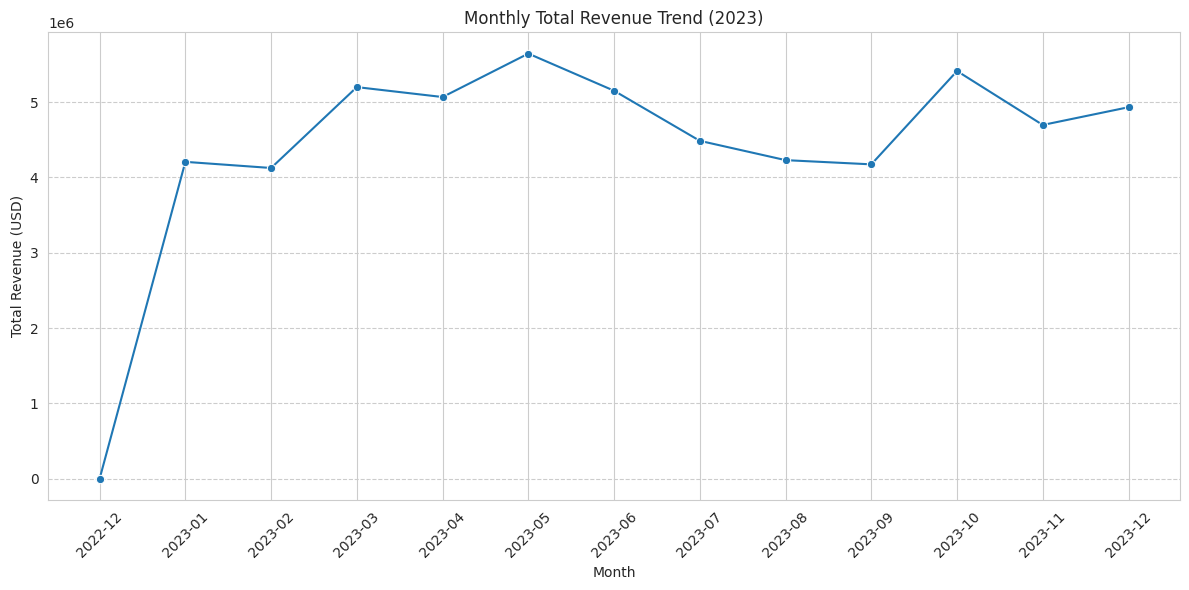

In [ ]:
# Group data by month and analyse monthly revenue

# Ensure 'tpep_pickup_datetime' is in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the month and year from the pickup datetime
# Include year in case the dataset spans multiple years (though here it's 2023)
df['pickup_year_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Group by the year-month and sum the 'total_amount' to get monthly revenue
monthly_revenue = df.groupby('pickup_year_month')['total_amount'].sum()

# Sort by month for chronological order (to_period('M') usually handles this, but good practice)
monthly_revenue = monthly_revenue.sort_index()

# Print the monthly revenue
print("Monthly Revenue (Total Amount):")
print(monthly_revenue)

# Visualize the monthly revenue trend using a line plot
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Period index to string for plotting
monthly_revenue.index = monthly_revenue.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o') # marker='o' adds points on the line
plt.title('Monthly Total Revenue Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45) # Rotate month labels for readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Number of Taxi Pickups by Quarter:
pickup_quarter
1    486931
2    539391
3    435046
4    510961
Name: count, dtype: int64

Proportion of Taxi Pickups by Quarter:
pickup_quarter
1    0.246881
2    0.273479
3    0.220575
4    0.259065
Name: count, dtype: float64


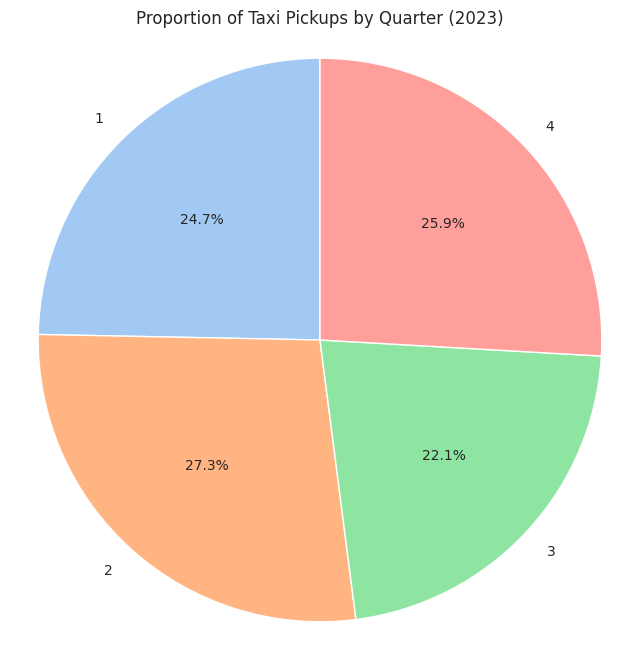

In [ ]:
# Calculate proportion of pickups in each quarter

# Ensure 'tpep_pickup_datetime' is in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the quarter from the pickup datetime
# .dt.quarter returns the quarter number (1 to 4)
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Calculate the number of pickups in each quarter
quarterly_pickups = df['pickup_quarter'].value_counts().sort_index()

# Calculate the total number of pickups
total_pickups = quarterly_pickups.sum()

# Calculate the proportion of pickups in each quarter
quarterly_proportion = quarterly_pickups / total_pickups

# Print the number and proportion of pickups per quarter
print("Number of Taxi Pickups by Quarter:")
print(quarterly_pickups)

print("\nProportion of Taxi Pickups by Quarter:")
print(quarterly_proportion)

# Visualize the proportion using a pie chart or bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
plt.pie(quarterly_proportion, labels=quarterly_proportion.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Taxi Pickups by Quarter (2023)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()





**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0


Original DataFrame shape: (1972329, 24)
DataFrame shape after excluding trips with trip_distance = 0: (1947667, 24)


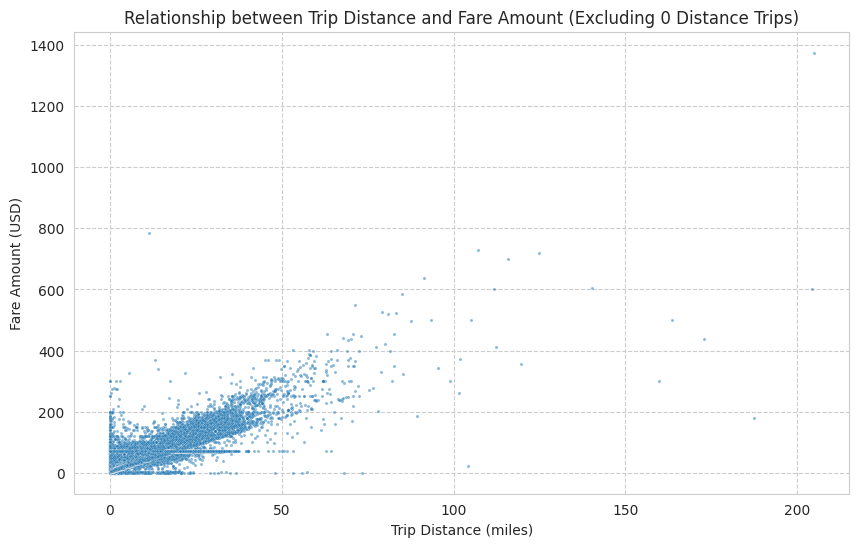


Correlation coefficient between Trip Distance and Fare Amount (for distance > 0): 0.95

Average Fare Amount by Trip Distance Bins:
distance_bin
0-1        7.898590
1-2       11.628489
2-5       18.914656
5-10      34.540862
10-20     61.708543
20-50     87.089770
50+      283.649068
Name: fare_amount, dtype: float64


/tmp/ipython-input-59-3752533783.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_distance_bin = df_positive_distance.groupby('distance_bin')['fare_amount'].mean().reindex(distance_labels) # Reindex to maintain order


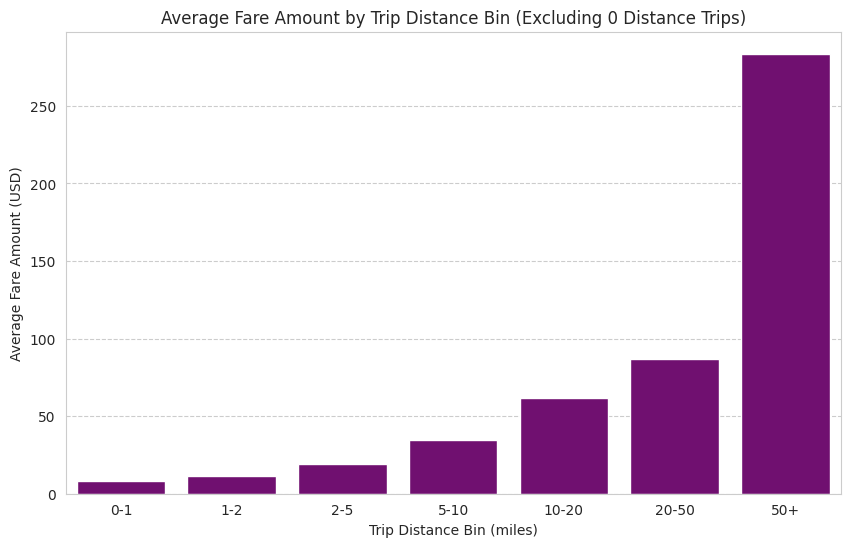

In [ ]:
# Show how trip fare is affected by distance
# Hint: You can leave out the trips with trip_distance = 0

# It's beneficial to leave out trips with trip_distance = 0
# because they represent non-standard trips (e.g., pickups within the same zone
# with no movement or potential data errors) and would skew the analysis of fare vs. distance relationship.

# Create a DataFrame containing only trips with a trip_distance greater than 0
df_positive_distance = df[df['trip_distance'] > 0].copy()

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after excluding trips with trip_distance = 0: {df_positive_distance.shape}")

# Now, analyze the relationship between trip_distance and fare_amount in the new DataFrame

# 1. Scatter plot to visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use scatterplot on the filtered DataFrame
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_positive_distance, alpha=0.5, s=5)
plt.title('Relationship between Trip Distance and Fare Amount (Excluding 0 Distance Trips)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(axis='both', linestyle='--')
plt.show()

# The scatter plot will likely show a general upward trend, but might also reveal
# clusters or variations due to different RatecodeIDs, traffic, or other factors.

# 2. Calculate the correlation coefficient
# This quantifies the strength and direction of the linear relationship
correlation_distance_fare = df_positive_distance['trip_distance'].corr(df_positive_distance['fare_amount'])
print(f"\nCorrelation coefficient between Trip Distance and Fare Amount (for distance > 0): {correlation_distance_fare:.2f}")
# A positive value indicates that as distance increases, fare tends to increase.
# The closer the value is to 1, the stronger the positive linear relationship.

# 3. Bin the trip_distance and look at the average fare per bin
# This can help see the trend more clearly, especially with a large number of data points
print("\nAverage Fare Amount by Trip Distance Bins:")
# Define bins for trip distance (adjust as needed)
distance_bins = [0, 1, 2, 5, 10, 20, 50, df_positive_distance['trip_distance'].max()]
distance_labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50', '50+'] # Labels for bins

# Create a new column with distance bins
df_positive_distance['distance_bin'] = pd.cut(df_positive_distance['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)

# Group by distance bin and calculate the average fare
average_fare_by_distance_bin = df_positive_distance.groupby('distance_bin')['fare_amount'].mean().reindex(distance_labels) # Reindex to maintain order

print(average_fare_by_distance_bin)

# Visualize the average fare per distance bin
plt.figure(figsize=(10, 6))
sns.barplot(x=average_fare_by_distance_bin.index, y=average_fare_by_distance_bin.values, color='purple')
plt.title('Average Fare Amount by Trip Distance Bin (Excluding 0 Distance Trips)')
plt.xlabel('Trip Distance Bin (miles)')
plt.ylabel('Average Fare Amount (USD)')
plt.grid(axis='y', linestyle='--')
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`


Original DataFrame shape: (1972329, 25)
DataFrame shape after filtering for valid trip duration (0-300 minutes): (1969920, 25)


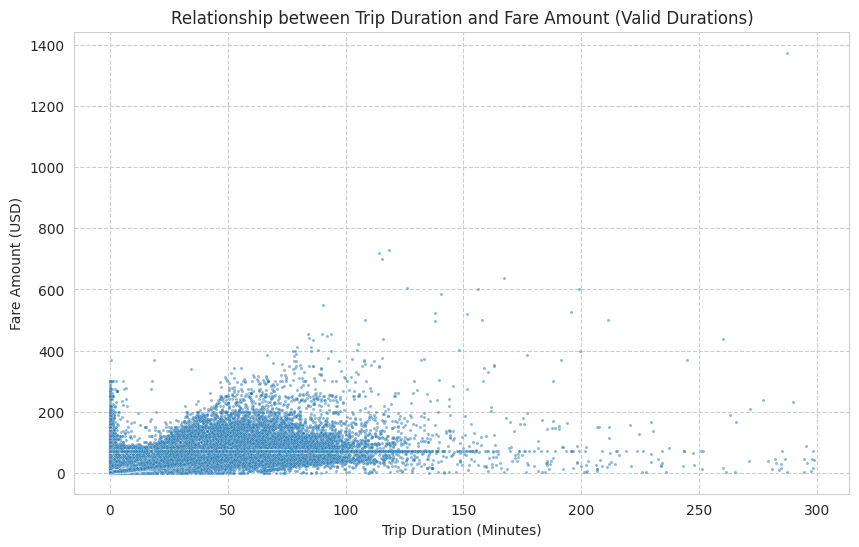


Correlation coefficient between Trip Duration and Fare Amount (for valid durations): 0.80

Average Fare Amount by Trip Duration Bins:
duration_bin
0-5         8.673988
5-10        9.349431
10-20      16.070412
20-30      28.781484
30-60      52.740439
60-120     74.171934
120-300    98.629341
Name: fare_amount, dtype: float64


/tmp/ipython-input-60-350647495.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_duration_bin = df_valid_duration.groupby('duration_bin')['fare_amount'].mean().reindex(duration_labels) # Reindex to maintain order


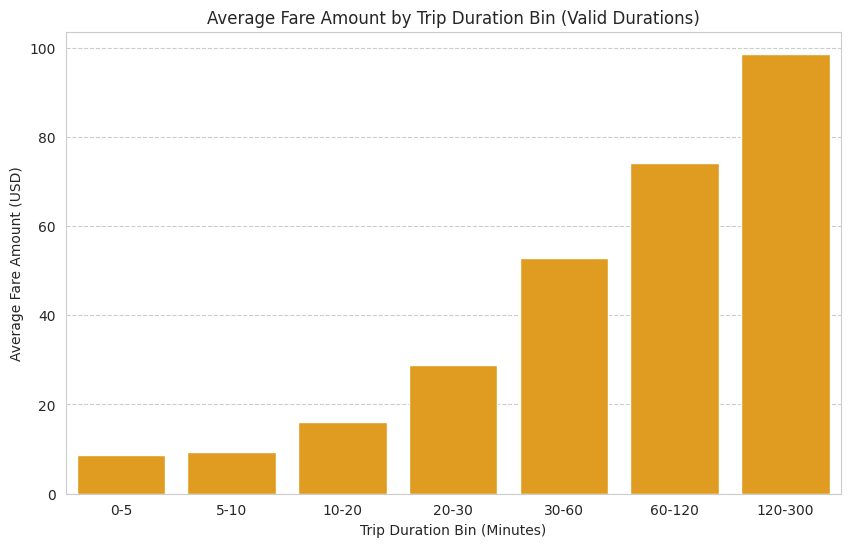

In [ ]:

# Show relationship between fare and trip duration

# To analyze the relationship between fare and trip duration,
# we first need to calculate the trip duration from the pickup and dropoff datetimes.

# Ensure pickup and dropoff datetimes are in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
# Using .dt.total_seconds() / 60 to get duration in minutes
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Handle potential invalid durations (e.g., dropoff before pickup, very long/short durations)
# Let's filter out trips with duration <= 0 (dropoff before or at pickup time)
# Also, filter out potentially erroneous very long durations (e.g., > 24 hours or some reasonable upper limit)
# A reasonable upper limit for a single taxi trip might be a few hours, let's say 5 hours (300 minutes) for initial filtering
# You might adjust this limit based on EDA of the duration distribution.

df_valid_duration = df[(df['trip_duration_minutes'] > 0) & (df['trip_duration_minutes'] <= 300)].copy()

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after filtering for valid trip duration (0-300 minutes): {df_valid_duration.shape}")

# Now, analyze the relationship between trip_duration_minutes and fare_amount

# 1. Scatter plot to visualize the relationship

plt.figure(figsize=(10, 6))
# Use scatterplot on the filtered DataFrame
sns.scatterplot(x='trip_duration_minutes', y='fare_amount', data=df_valid_duration, alpha=0.5, s=5)
plt.title('Relationship between Trip Duration and Fare Amount (Valid Durations)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(axis='both', linestyle='--')
plt.show()

# The scatter plot should show a positive relationship, as longer trips usually cost more.
# However, the relationship might be more scattered than fare vs. distance because fare calculation
# often involves both distance and time (especially in traffic).

# 2. Calculate the correlation coefficient
correlation_duration_fare = df_valid_duration['trip_duration_minutes'].corr(df_valid_duration['fare_amount'])
print(f"\nCorrelation coefficient between Trip Duration and Fare Amount (for valid durations): {correlation_duration_fare:.2f}")
# Expect a positive correlation. Compare it to the distance-fare correlation – which is stronger?

# 3. Bin the trip_duration and look at the average fare per bin
print("\nAverage Fare Amount by Trip Duration Bins:")
# Define bins for trip duration (adjust as needed)
duration_bins = [0, 5, 10, 20, 30, 60, 120, 301] # Using 301 to include 300 in the last bin
duration_labels = ['0-5', '5-10', '10-20', '20-30', '30-60', '60-120', '120-300'] # Labels for bins

# Create a new column with duration bins
df_valid_duration['duration_bin'] = pd.cut(df_valid_duration['trip_duration_minutes'], bins=duration_bins, labels=duration_labels, right=False)

# Group by duration bin and calculate the average fare
average_fare_by_duration_bin = df_valid_duration.groupby('duration_bin')['fare_amount'].mean().reindex(duration_labels) # Reindex to maintain order

print(average_fare_by_duration_bin)

# Visualize the average fare per duration bin
plt.figure(figsize=(10, 6))
sns.barplot(x=average_fare_by_duration_bin.index, y=average_fare_by_duration_bin.values, color='orange')
plt.title('Average Fare Amount by Trip Duration Bin (Valid Durations)')
plt.xlabel('Trip Duration Bin (Minutes)')
plt.ylabel('Average Fare Amount (USD)')
plt.grid(axis='y', linestyle='--')
plt.show()

Average Fare Amount by Passenger Count:
passenger_count
0.0    17.445936
1.0    19.286083
2.0    22.176697
3.0    21.821535
4.0    23.794816
5.0    19.182145
6.0    18.980290
Name: fare_amount, dtype: float64


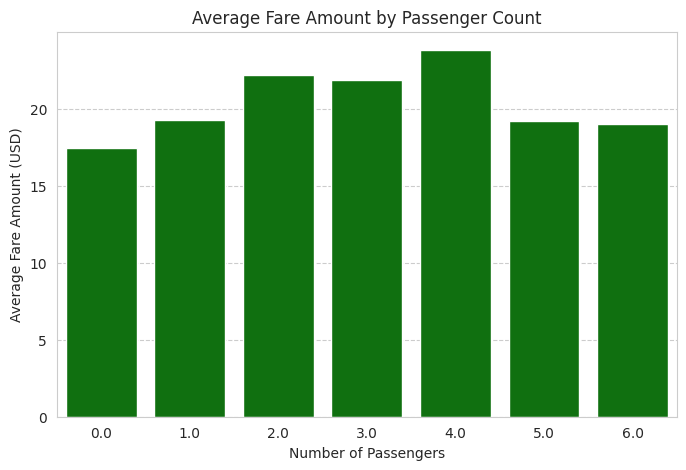

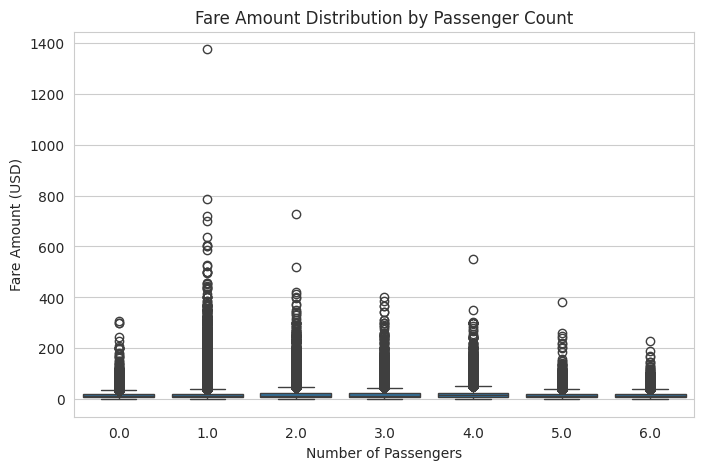


Correlation coefficient between Passenger Count and Fare Amount: 0.04


In [ ]:
# Show relationship between fare and number of passengers

# Analyze the relationship between 'fare_amount' and 'passenger_count'.
# Since 'passenger_count' is a discrete variable (typically integers 1-6 after cleaning),
# we can look at the average fare for each passenger count category.

# We'll use the main DataFrame 'df' as we've already cleaned 'passenger_count'
# by removing values > 6 and imputing missing values. We don't necessarily need
# to filter out zero fares unless the analysis specifically requires only paid trips.
# For this relationship, it might be interesting to see if trips with 0 passengers
# (which might exist as data errors or specific scenarios) have a different fare pattern.
# However, based on typical understanding, passenger_count 0 is likely invalid for a billed trip.
# Let's analyze based on the cleaned 'passenger_count' column (1-6).

# Group data by 'passenger_count' and calculate the average 'fare_amount'
average_fare_by_passenger_count = df.groupby('passenger_count')['fare_amount'].mean().sort_index()

# Print the average fare for each passenger count
print("Average Fare Amount by Passenger Count:")
print(average_fare_by_passenger_count)

# Visualize the relationship using a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_by_passenger_count.index, y=average_fare_by_passenger_count.values, color='green')
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Amount (USD)')
plt.xticks(rotation=0) # Passenger counts are few, no rotation needed
plt.grid(axis='y', linestyle='--')
plt.show()


# Consider if there's a significant difference in distributions using box plots
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df) # Use the main DataFrame
plt.title('Fare Amount Distribution by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount (USD)')
# Due to potential outliers in fare_amount, the box plot might be stretched vertically.
# You might consider limiting the y-axis for better visualization of the main clusters
# plt.ylim(0, 100) # Example: Limit y-axis to 0-100 USD
plt.show()


# You can also calculate the correlation, but be mindful that correlation measures
# linear relationship and 'passenger_count' is discrete. It might not capture
# non-linear associations effectively.
correlation_passenger_fare = df['passenger_count'].corr(df['fare_amount'])
print(f"\nCorrelation coefficient between Passenger Count and Fare Amount: {correlation_passenger_fare:.2f}")
# A low correlation is expected as passenger count generally doesn't directly determine fare,
# unless there are specific surcharges per passenger (which is uncommon in NYC taxis).




Original DataFrame shape: (1972329, 25)
DataFrame shape after filtering for positive tip and positive distance: (1524140, 25)


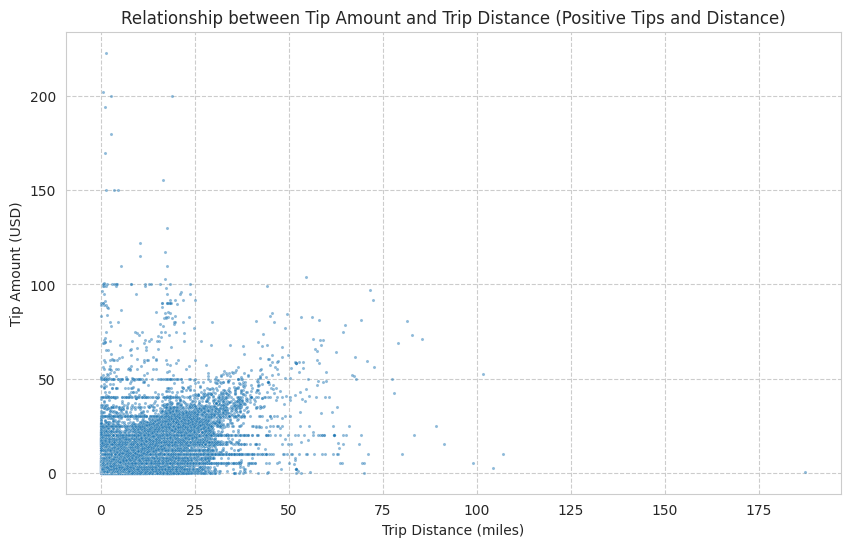


Correlation coefficient between Tip Amount and Trip Distance (for positive tips/distance): 0.80

Average Tip Amount by Trip Distance Bins (Positive Tips and Distance):
distance_bin
0-1       2.408897
1-2       3.036350
2-5       4.326372
5-10      7.866623
10-20    13.173668
20-50    16.669290
50+      32.333728
Name: tip_amount, dtype: float64


/tmp/ipython-input-62-2710970187.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tip_by_distance_bin = df_tipped_positive_distance.groupby('distance_bin')['tip_amount'].mean().reindex(distance_labels).dropna()


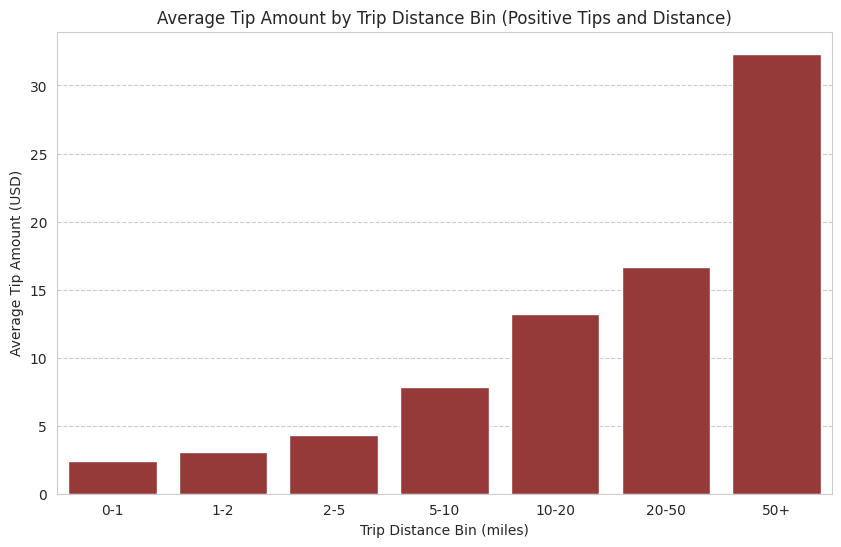


Average Tip Percentage by Trip Distance Bins (Positive Tips and Distance, Fare > 0):
distance_bin
0-1      32.522008
1-2      26.721426
2-5      23.242675
5-10     22.585197
10-20    21.566533
20-50    19.918541
50+      12.364907
Name: tip_percentage, dtype: float64


/tmp/ipython-input-62-2710970187.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tip_pct_by_distance_bin = df_tipped_positive_distance.groupby('distance_bin')['tip_percentage'].mean().reindex(distance_labels).dropna()


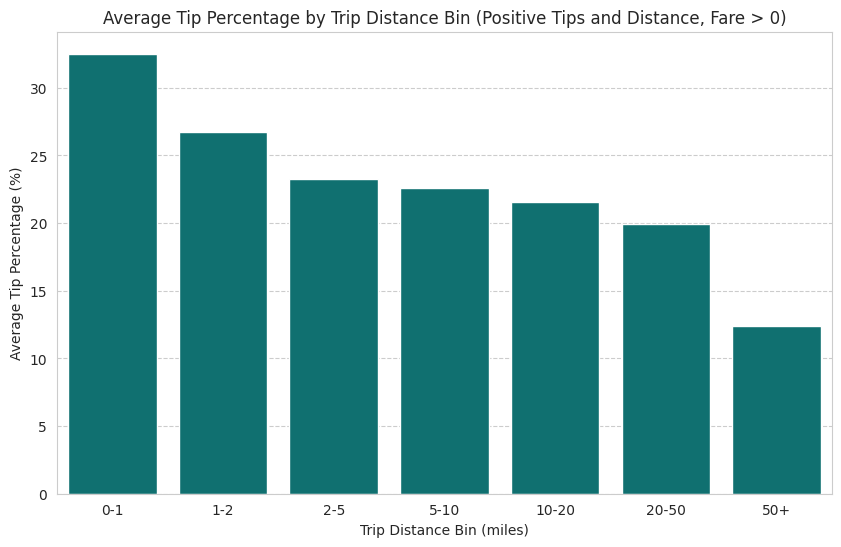

In [ ]:
# Show relationship between tip and trip distance

# Analyze the relationship between 'tip_amount' and 'trip_distance'.
# Tipping behavior can be influenced by trip characteristics like distance.

# It's often beneficial to analyze this relationship for trips where a tip was actually given (tip_amount > 0)
# and for trips where the distance is greater than 0 to avoid confounding factors.

# Create a DataFrame containing trips with positive tip amount and positive trip distance
df_tipped_positive_distance = df[(df['tip_amount'] > 0) & (df['trip_distance'] > 0)].copy()

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after filtering for positive tip and positive distance: {df_tipped_positive_distance.shape}")

# Now, analyze the relationship between trip_distance and tip_amount in the filtered DataFrame

# 1. Scatter plot to visualize the relationship

plt.figure(figsize=(10, 6))
# Use scatterplot on the filtered DataFrame
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_tipped_positive_distance, alpha=0.5, s=5)
plt.title('Relationship between Tip Amount and Trip Distance (Positive Tips and Distance)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.grid(axis='both', linestyle='--')
plt.show()

# The scatter plot might show a positive trend – longer trips could have higher tip amounts,
# but there might be a lot of variability.

# 2. Calculate the correlation coefficient
correlation_tip_distance = df_tipped_positive_distance['tip_amount'].corr(df_tipped_positive_distance['trip_distance'])
print(f"\nCorrelation coefficient between Tip Amount and Trip Distance (for positive tips/distance): {correlation_tip_distance:.2f}")
# Expect a positive correlation, but potentially weaker than fare vs. distance/duration,
# as tipping is also influenced by service quality, payment method, etc.

# 3. Bin the trip_distance and look at the average tip amount per bin
print("\nAverage Tip Amount by Trip Distance Bins (Positive Tips and Distance):")
# Define bins for trip distance (same bins as before or adjust)
# Using the same bins as the fare-distance analysis for consistency
distance_bins = [0, 1, 2, 5, 10, 20, 50, df_tipped_positive_distance['trip_distance'].max()]
distance_labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50', '50+']

# Create a new column with distance bins in the filtered DataFrame
df_tipped_positive_distance['distance_bin'] = pd.cut(df_tipped_positive_distance['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)

# Group by distance bin and calculate the average tip amount
# Use .dropna() to exclude bins that might not have any data after filtering
average_tip_by_distance_bin = df_tipped_positive_distance.groupby('distance_bin')['tip_amount'].mean().reindex(distance_labels).dropna()

print(average_tip_by_distance_bin)

# Visualize the average tip amount per distance bin
if not average_tip_by_distance_bin.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=average_tip_by_distance_bin.index, y=average_tip_by_distance_bin.values, color='brown')
    plt.title('Average Tip Amount by Trip Distance Bin (Positive Tips and Distance)')
    plt.xlabel('Trip Distance Bin (miles)')
    plt.ylabel('Average Tip Amount (USD)')
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("\nNo data points in the filtered DataFrame to plot average tip by distance bin.")


# You can also analyze the relationship between tip percentage and trip distance
# We calculated 'tip_percentage' earlier, but need to filter for positive tip/distance again if using that column directly
# Or recalculate on the filtered DataFrame
df_tipped_positive_distance['tip_percentage'] = (df_tipped_positive_distance['tip_amount'] / df_tipped_positive_distance['fare_amount']) * 100
# Clean up potential extreme percentages and handle fare_amount = 0 cases from the filtered df
df_tipped_positive_distance = df_tipped_positive_distance[df_tipped_positive_distance['fare_amount'] > 0].copy()
if not df_tipped_positive_distance.empty:
     df_tipped_positive_distance['tip_percentage'] = df_tipped_positive_distance['tip_percentage'].clip(upper=200) # Cap

     print("\nAverage Tip Percentage by Trip Distance Bins (Positive Tips and Distance, Fare > 0):")
     average_tip_pct_by_distance_bin = df_tipped_positive_distance.groupby('distance_bin')['tip_percentage'].mean().reindex(distance_labels).dropna()
     print(average_tip_pct_by_distance_bin)

     if not average_tip_pct_by_distance_bin.empty:
         plt.figure(figsize=(10, 6))
         sns.barplot(x=average_tip_pct_by_distance_bin.index, y=average_tip_pct_by_distance_bin.values, color='teal')
         plt.title('Average Tip Percentage by Trip Distance Bin (Positive Tips and Distance, Fare > 0)')
         plt.xlabel('Trip Distance Bin (miles)')
         plt.ylabel('Average Tip Percentage (%)')
         plt.grid(axis='y', linestyle='--')
         plt.show()
     else:
         print("\nNo data points in the filtered DataFrame to plot average tip percentage by distance bin.")
else:
    print("\nCannot calculate tip percentage on the filtered DataFrame as no trips have a fare amount > 0 after initial filtering.")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Distribution of Payment Types:
payment_type
1    1610204
2     337483
3       9663
4      14979
Name: count, dtype: int64

Distribution of Payment Types (with descriptions):
payment_type
Credit card    1610204
Cash            337483
No charge         9663
Dispute          14979
Name: count, dtype: int64

Proportion of Payment Types:
payment_type
Credit card    0.816397
Cash           0.171109
No charge      0.004899
Dispute        0.007595
Name: count, dtype: float64


/tmp/ipython-input-63-2968843419.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_labels, y=plot_values, palette='viridis')


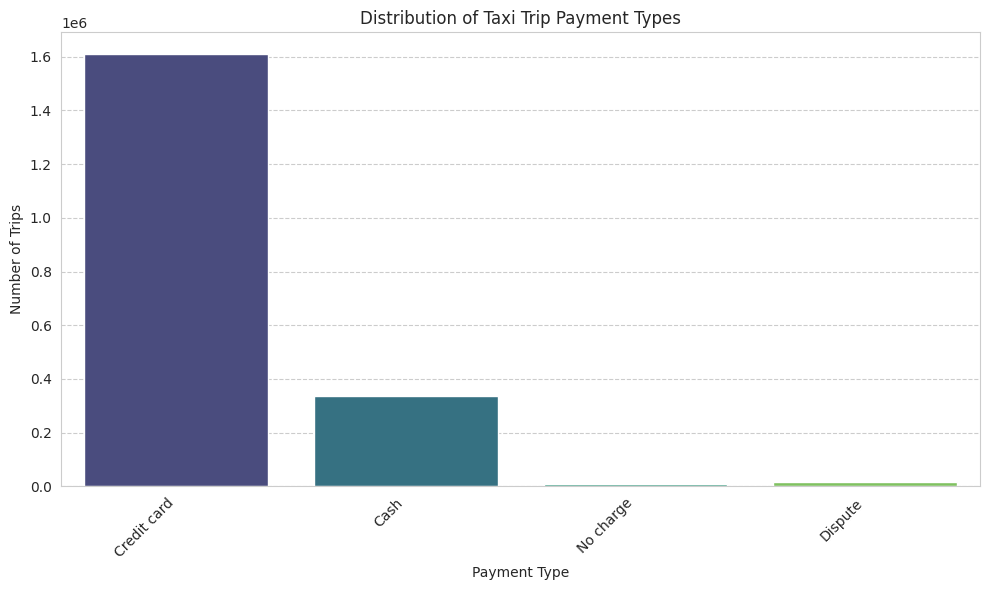

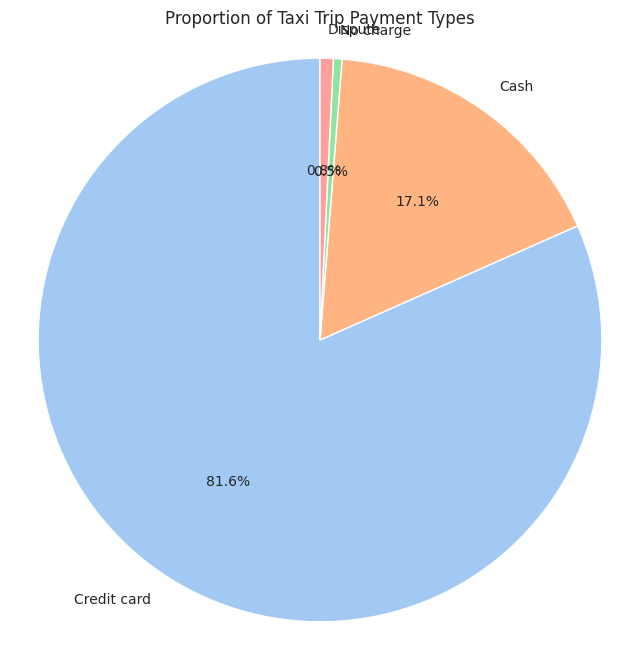

In [ ]:
# Analyse the distribution of different payment types (payment_type).

# Analyze the distribution of the 'payment_type' column.
# 'payment_type' is a categorical variable representing how the passenger paid.

# We'll use the main DataFrame 'df' as we've already cleaned 'payment_type'
# by removing values outside the defined range (1-6).

# Get the value counts for each payment type
payment_type_counts = df['payment_type'].value_counts()

# Sort by index (the payment type code) for easier interpretation and mapping to description
payment_type_counts_ordered = payment_type_counts.sort_index()

# Print the distribution of payment types
print("Distribution of Payment Types:")
print(payment_type_counts_ordered)

# Map the payment type codes to their descriptions for better readability in output and plot
payment_type_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Replace the index (codes) with descriptions for printing
payment_type_counts_described = payment_type_counts_ordered.rename(index=payment_type_map)
print("\nDistribution of Payment Types (with descriptions):")
print(payment_type_counts_described)


# Calculate the proportion of each payment type
total_trips = payment_type_counts.sum()
payment_type_proportion = payment_type_counts_ordered / total_trips

print("\nProportion of Payment Types:")
print(payment_type_proportion.rename(index=payment_type_map))


# Visualize the distribution using a bar plot or pie chart
import matplotlib.pyplot as plt
import seaborn as sns

# Use the described counts/proportions for plotting labels
plot_labels = payment_type_counts_described.index
plot_values = payment_type_counts_described.values

plt.figure(figsize=(10, 6))
sns.barplot(x=plot_labels, y=plot_values, palette='viridis')
plt.title('Distribution of Taxi Trip Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout
plt.show()

# Pie chart for proportions
plt.figure(figsize=(8, 8))
plt.pie(payment_type_proportion, labels=payment_type_proportion.index.map(payment_type_map), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Taxi Trip Payment Types')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/My Drive/EDA/AssignmentData/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

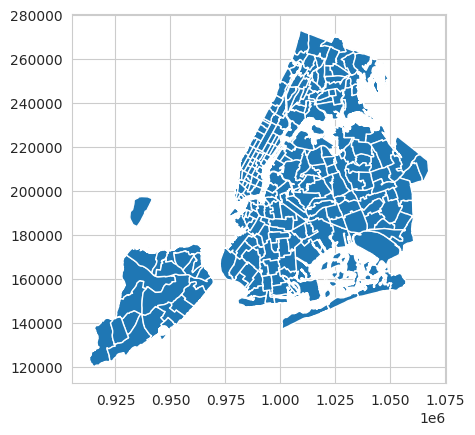

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

# Before merging, let's inspect the columns and their data types in both DataFrames
print("Info for trip records DataFrame (df):")
df.info()
print("\nInfo for zones GeoDataFrame:")
zones.info()

if zones['LocationID'].dtype == 'object':
    try:
        zones['LocationID'] = zones['LocationID'].astype(int)
        print("\nConverted 'LocationID' in zones to integer.")
    except ValueError:
        print("\nWarning: Could not convert 'LocationID' in zones to integer. Check its values.")


# Corrected the column names to lowercase 'zone' and 'borough'
merged_df_pickup = pd.merge(df, zones[['LocationID', 'zone', 'borough']],
                             left_on='PULocationID',
                             right_on='LocationID',
                             how='left')

print("\nInfo for merged DataFrame (merged_df_pickup):")
merged_df_pickup.info()
print("\nFirst 5 rows of merged DataFrame (merged_df_pickup):")
print(merged_df_pickup.head())

Info for trip records DataFrame (df):
<class 'pandas.core.frame.DataFrame'>
Index: 1972329 entries, 1788 to 2820817
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  combined_airport_fee   float6

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group the merged DataFrame by the pickup location (Zone and Borough)
# and calculate the number of trips for each location.

# Ensure the necessary columns are in the DataFrame
if 'zone' in merged_df_pickup.columns and 'borough' in merged_df_pickup.columns:
    # Group by 'Zone' and 'Borough' and count the number of trips in each group
    # Using size() is an efficient way to count rows per group
    trips_by_pickup_location = merged_df_pickup.groupby(['zone', 'borough']).size().reset_index(name='Number_of_Trips')

    # Sort the locations by the number of trips in descending order
    trips_by_pickup_location = trips_by_pickup_location.sort_values(by='Number_of_Trips', ascending=False)

    # Display the result
    print("Number of Trips by Pickup Location (Zone and Borough):")
    print(trips_by_pickup_location.head(10)) # Display top 10 locations by trip count
    print("\n...")
    print(trips_by_pickup_location.tail(10)) # Display bottom 10 locations by trip count

else:
    print("Columns 'Zone' or 'Borough' not found in the merged DataFrame. Please ensure the merge was successful.")


Number of Trips by Pickup Location (Zone and Borough):
                             zone    borough  Number_of_Trips
119                   JFK Airport     Queens           109575
152                Midtown Center  Manhattan            91322
228         Upper East Side South  Manhattan            90322
227         Upper East Side North  Manhattan            79498
129             LaGuardia Airport     Queens            71855
153                  Midtown East  Manhattan            68847
177  Penn Station/Madison Sq West  Manhattan            68676
221     Times Sq/Theatre District  Manhattan            67274
133           Lincoln Square East  Manhattan            66738
161                   Murray Hill  Manhattan            57642

...
                                    zone        borough  Number_of_Trips
54                          Crotona Park          Bronx                2
122                          Jamaica Bay         Queens                2
190                        Rikers Islan

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

# To visualize the number of pickups or dropoffs on the map,
# we need to calculate the trip counts per zone and then merge these counts
# back into the original 'zones' GeoDataFrame.

# 1. Calculate Pickup Counts per Zone
# Use the DataFrame with merged pickup zone info (df_with_zones or merged_df_pickup)
# Group by the pickup Zone name and count the number of trips
pickup_counts_by_zone = merged_df_pickup['zone'].value_counts().reset_index()
pickup_counts_by_zone.columns = ['zone', 'pickup_count'] # Rename columns for clarity

print("\nPickup counts per zone (first 10):")
print(pickup_counts_by_zone.head(10))


# 2. Merge Pickup Counts with Zones GeoDataFrame
# We will merge the 'pickup_counts_by_zone' DataFrame with the original 'zones' GeoDataFrame
# using the 'Zone' column as the key.
# Perform a left merge on the zones GeoDataFrame to keep all zones, even if they had no pickups in the sampled data.
zones_with_pickup_counts = zones.merge(pickup_counts_by_zone,
                                      left_on='zone',
                                      right_on='zone',
                                      how='left')

# Fill NaN values in 'pickup_count' with 0 for zones that had no pickups
zones_with_pickup_counts['pickup_count'] = zones_with_pickup_counts['pickup_count'].fillna(0).astype(int)


print("\nZones GeoDataFrame merged with pickup counts (first 5):")
print(zones_with_pickup_counts.head())

# Verify the merge by checking info and looking at columns
print("\nInfo for Zones GeoDataFrame with pickup counts:")
zones_with_pickup_counts.info()


dropoff_counts_by_zone = df['DOLocationID'].value_counts().reset_index()
dropoff_counts_by_zone.columns = ['LocationID', 'dropoff_count'] # Rename columns

print("\nDropoff counts per zone (first 10):")
print(dropoff_counts_by_zone.head(10))

# Merge Dropoff Counts with Zones GeoDataFrame
zones_with_counts = zones_with_pickup_counts.merge(dropoff_counts_by_zone,
                                                 left_on='LocationID',
                                                 right_on='LocationID',
                                                 how='left')

# Fill NaN values in 'dropoff_count' with 0
zones_with_counts['dropoff_count'] = zones_with_counts['dropoff_count'].fillna(0).astype(int)

print("\nZones GeoDataFrame merged with pickup and dropoff counts (first 5):")
print(zones_with_counts.head())

print("\nInfo for Zones GeoDataFrame with pickup and dropoff counts:")
zones_with_counts.info()


# Now 'zones_with_counts' is a GeoDataFrame containing the geometry of each zone
# and columns for 'pickup_count' and 'dropoff_count', ready for spatial visualization.


Pickup counts per zone (first 10):
                           zone  pickup_count
0                   JFK Airport        109575
1                Midtown Center         91322
2         Upper East Side South         90322
3         Upper East Side North         79498
4             LaGuardia Airport         71855
5                  Midtown East         68847
6  Penn Station/Madison Sq West         68676
7     Times Sq/Theatre District         67274
8           Lincoln Square East         66738
9                   Murray Hill         57642

Zones GeoDataFrame merged with pickup counts (first 5):
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.0921

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

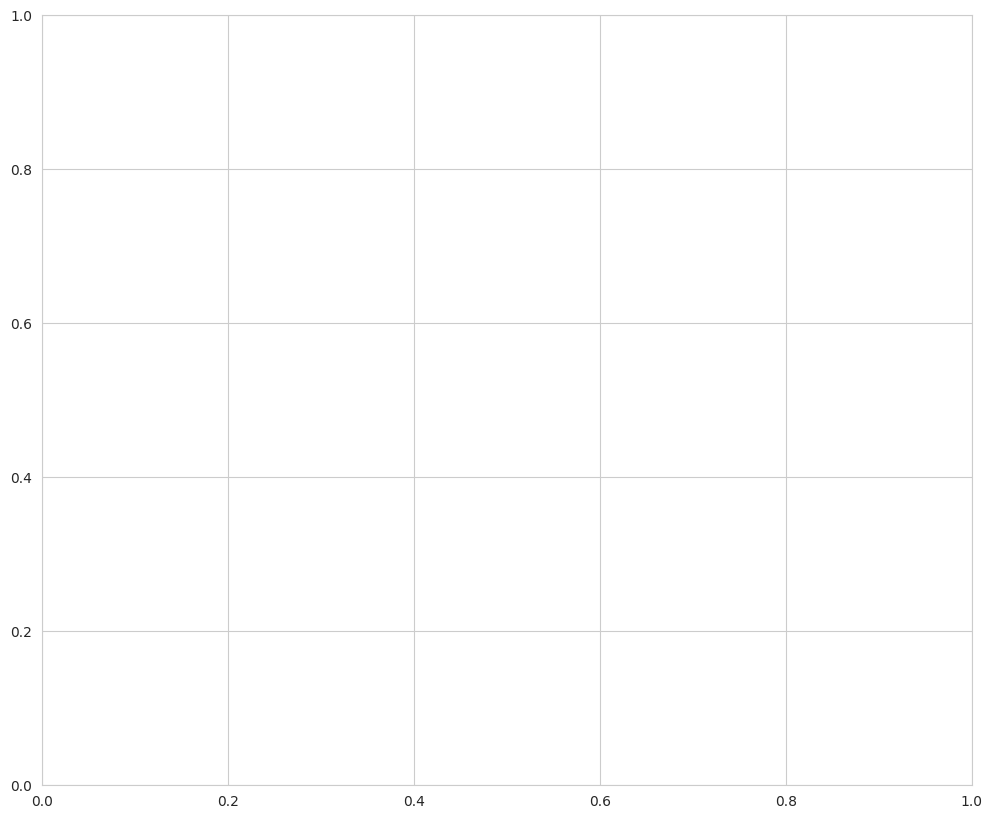

In [ ]:
# Define figure and axis
# fig: The overall figure object.
# ax: The Axes object, which is the area where the plot will be drawn.
# plt.subplots() creates a figure and a set of subplots.
# Here, we create 1 row and 1 column of subplots (1, 1).
# figsize=(12, 10) sets the size of the figure in inches (width, height).
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Display the plot
plt.show()


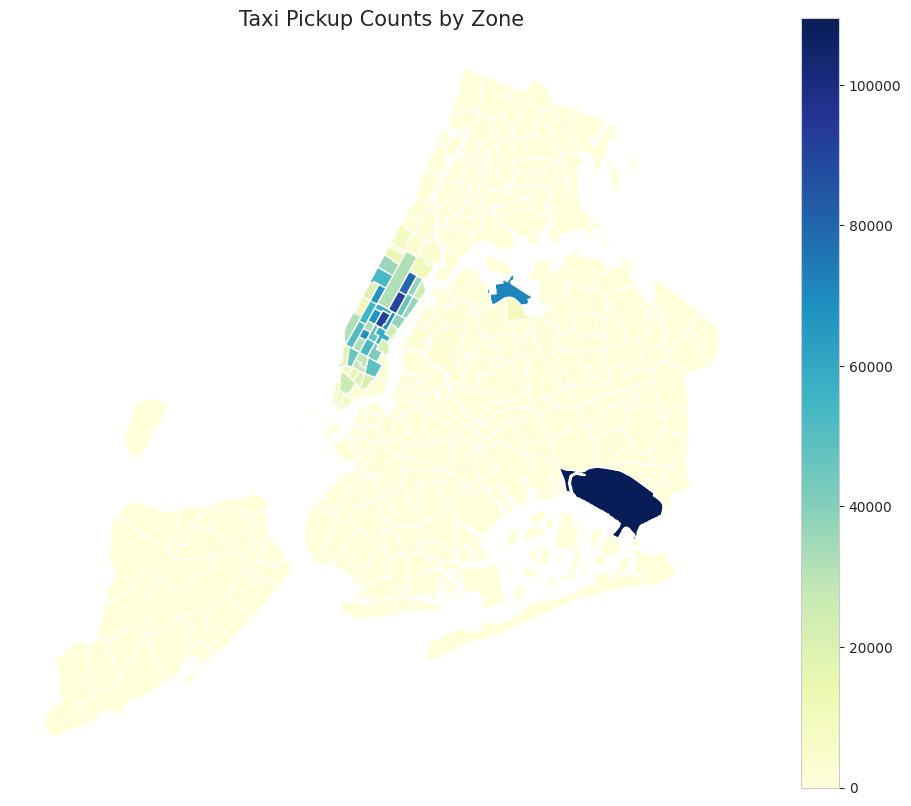

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_with_counts.plot(
    ax=ax,               # Specify the axis created in the previous step
    column='pickup_count', # Choose the column to visualize (e.g., 'pickup_count')
    legend=True,         # Display a colorbar legend
    cmap='YlGnBu',       # Choose a colormap (Yellow-Green-Blue is often good for quantities)
    # You can add more parameters as discussed before, like:
    # linewidth=0.5,     # Line width of polygon borders
    # edgecolor='black'  # Color of polygon borders
)

# Optional: Add a title to the plot
ax.set_title('Taxi Pickup Counts by Zone', fontsize=15)

# Optional: Turn off the axis for a cleaner map appearance
ax.set_axis_off()

# Display the plot
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

df_valid_trips = df[(df['trip_distance'] > 0) & (df['trip_duration_minutes'] > 0)].copy()

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after filtering for positive distance and duration: {df_valid_trips.shape}")

# 1. Calculate speed (Speed = Distance / Time)
# Speed in miles per minute (miles / minute)
df_valid_trips['speed_mph'] = (df_valid_trips['trip_distance'] / df_valid_trips['trip_duration_minutes']) * 60 # Convert to miles per hour


# Handle potential outliers in speed (e.g., extremely high speeds could be data errors)
# Let's define a reasonable upper limit for taxi speed (e.g., 60 mph is very high in NYC)
# You might inspect the distribution of 'speed_mph' before setting a limit.
speed_upper_limit = 60 # mph
df_valid_trips = df_valid_trips[df_valid_trips['speed_mph'] <= speed_upper_limit].copy()
print(f"DataFrame shape after filtering for reasonable speed (<= {speed_upper_limit} mph): {df_valid_trips.shape}")


# 2. Define routes
# A route can be defined as a combination of pickup and dropoff location IDs.
df_valid_trips['route'] = df_valid_trips['PULocationID'].astype(str) + '_to_' + df_valid_trips['DOLocationID'].astype(str)


# 3. Categorize trips by time of day
# We can create different time-of-day categories based on 'pickup_hour'.
# Example categories: Morning (6-11), Afternoon (11-17), Evening (17-22), Night (22-6)
def get_time_of_day(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_valid_trips['time_of_day'] = df_valid_trips['pickup_hour'].apply(get_time_of_day)


# 4. Calculate the average speed for each route within each time-of-day category
average_speed_by_route_time = df_valid_trips.groupby(['route', 'time_of_day'])['speed_mph'].mean().reset_index()


# 5. Identify the routes with the lowest average speeds in each time-of-day category
print("\nTop 5 Slowest Routes for Each Time of Day:")

# Loop through each time of day category
for time_category in ['Morning', 'Afternoon', 'Evening', 'Night']:
    print(f"\n--- {time_category} ---")

    # Filter for the current time category
    speed_in_time_category = average_speed_by_route_time[average_speed_by_route_time['time_of_day'] == time_category]

    # Sort by average speed in ascending order (slowest first)
    slowest_routes = speed_in_time_category.sort_values(by='speed_mph', ascending=True)

    # Get the top N slowest routes (e.g., top 5)
    top_n_slowest = slowest_routes.head(5)

    # To make the output more readable, merge with zone names
    # First, prepare a mapping from LocationID to Zone name
    location_id_to_zone = zones[['LocationID', 'zone']].set_index('LocationID')['zone'].to_dict()

    # Function to map route string (e.g., '237_to_162') to zone names
    def map_route_to_zones(route_str):
        try:
            pu_id, do_id = route_str.split('_to_')
            pu_zone = location_id_to_zone.get(int(pu_id), f'Unknown_{pu_id}')
            do_zone = location_id_to_zone.get(int(do_id), f'Unknown_{do_id}')
            return f"{pu_zone} to {do_zone}"
        except:
            return route_str # Return original if mapping fails

    # Apply the mapping to the route column in the top N slowest routes
    top_n_slowest['route_names'] = top_n_slowest['route'].apply(map_route_to_zones)

    # Print the top N slowest routes with their names and average speed
    print(top_n_slowest[['route_names', 'speed_mph']].round(2))


Original DataFrame shape: (1972329, 25)
DataFrame shape after filtering for positive distance and duration: (1947566, 25)
DataFrame shape after filtering for reasonable speed (<= 60 mph): (1946602, 26)

Top 5 Slowest Routes for Each Time of Day:

--- Morning ---
                                route_names  speed_mph
3859              Battery Park to Chinatown       0.09
3560   Inwood Hill Park to Inwood Hill Park       0.12
17662     Bedford Park to East Harlem North       0.12
32559         Central Harlem to City Island       0.12
20221     Starrett City to Sunset Park West       0.14

--- Afternoon ---
                                  route_names  speed_mph
3047          Howard Beach to Jackson Heights       0.07
5222               Kew Gardens to Unknown_265       0.07
36467          Dyker Heights to South Jamaica       0.08
38670           East Harlem South to Rosedale       0.09
25397  Upper East Side South to Arden Heights       0.10

--- Evening ---
                            

/tmp/ipython-input-81-1230893746.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n_slowest['route_names'] = top_n_slowest['route'].apply(map_route_to_zones)
/tmp/ipython-input-81-1230893746.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n_slowest['route_names'] = top_n_slowest['route'].apply(map_route_to_zones)
/tmp/ipython-input-81-1230893746.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Number of Taxi Pickups by Hour of Day:
pickup_hour
0      51208
1      34528
2      22550
3      14709
4       9437
5      10018
6      24466
7      48987
8      68273
9      78280
10     85626
11     93033
12    100997
13    104099
14    111561
15    114286
16    114272
17    123551
18    129180
19    115912
20    103431
21    103163
22     95155
23    215607
Name: count, dtype: int64

The busiest hour for taxi pickups is Hour 23 with 215607 trips.


/tmp/ipython-input-82-4147155220.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette=colors)


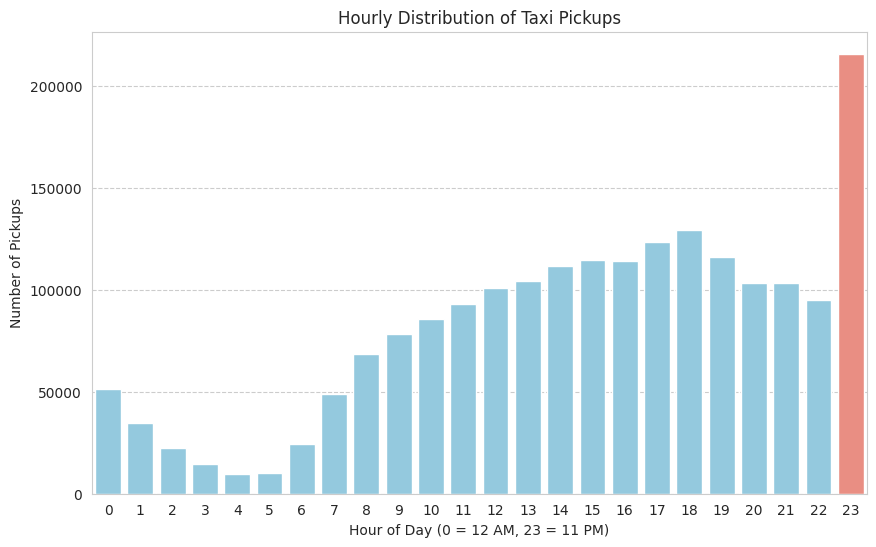

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

# Ensure 'tpep_pickup_datetime' is in datetime format (if not already)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the number of pickups for each hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Print the hourly pickup counts
print("Number of Taxi Pickups by Hour of Day:")
print(hourly_pickups)

# Find the busiest hour
# The busiest hour is the hour with the maximum number of pickups.
busiest_hour = hourly_pickups.idxmax() # idxmax() returns the index (the hour) of the maximum value
busiest_hour_count = hourly_pickups.max() # max() returns the maximum value (the count)

print(f"\nThe busiest hour for taxi pickups is Hour {busiest_hour} with {busiest_hour_count} trips.")




plt.figure(figsize=(10, 6))
# Use a color palette and highlight the busiest hour
colors = ['skyblue' if hour != busiest_hour else 'salmon' for hour in hourly_pickups.index]
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette=colors)

plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day (0 = 12 AM, 23 = 11 PM)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24)) # Ensure all hours from 0 to 23 are shown
plt.grid(axis='y', linestyle='--')

# Add annotation for the busiest hour (optional)
# plt.text(busiest_hour, busiest_hour_count, f'{busiest_hour_count}', ha='center', va='bottom')


plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 # Replace with the actual sampling fraction you used

# Check if the sample_fraction is valid
if not (0 < sample_fraction <= 1):
    print("Error: sample_fraction must be between 0 (exclusive) and 1 (inclusive).")
elif 'hourly_pickups' not in locals():
     print("Error: 'hourly_pickups' variable not found. Please calculate hourly pickups first.")
else:
    print(f"\nUsing sampling fraction: {sample_fraction}")

    # Find the five busiest hours based on sampled data
    # Sort the hourly pickups in descending order and get the top 5
    busiest_5_hours_sampled = hourly_pickups.sort_values(ascending=False).head(5)

    print("\nTop 5 Busiest Hours based on Sampled Data:")
    print(busiest_5_hours_sampled)

    # Scale up the counts for these five hours to estimate the actual number of trips
    estimated_busiest_5_hours_actual = busiest_5_hours_sampled / sample_fraction

    print("\nEstimated Actual Number of Trips in the Top 5 Busiest Hours (Scaled Up):")
    # Round to the nearest whole number as trip counts are integers
    print(estimated_busiest_5_hours_actual.round(0).astype(int))

    # You can also identify the hours themselves
    busiest_hour_indices = estimated_busiest_5_hours_actual.index.tolist()
    print(f"\nThe five estimated busiest hours are (in order of sampled traffic): {busiest_hour_indices}")




Using sampling fraction: 0.05

Top 5 Busiest Hours based on Sampled Data:
pickup_hour
23    215607
18    129180
17    123551
19    115912
15    114286
Name: count, dtype: int64

Estimated Actual Number of Trips in the Top 5 Busiest Hours (Scaled Up):
pickup_hour
23    4312140
18    2583600
17    2471020
19    2318240
15    2285720
Name: count, dtype: int64

The five estimated busiest hours are (in order of sampled traffic): [23, 18, 17, 19, 15]


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.


Categorized days into Weekday/Weekend.
day_type
Weekday    1432639
Weekend     539690
Name: count, dtype: int64


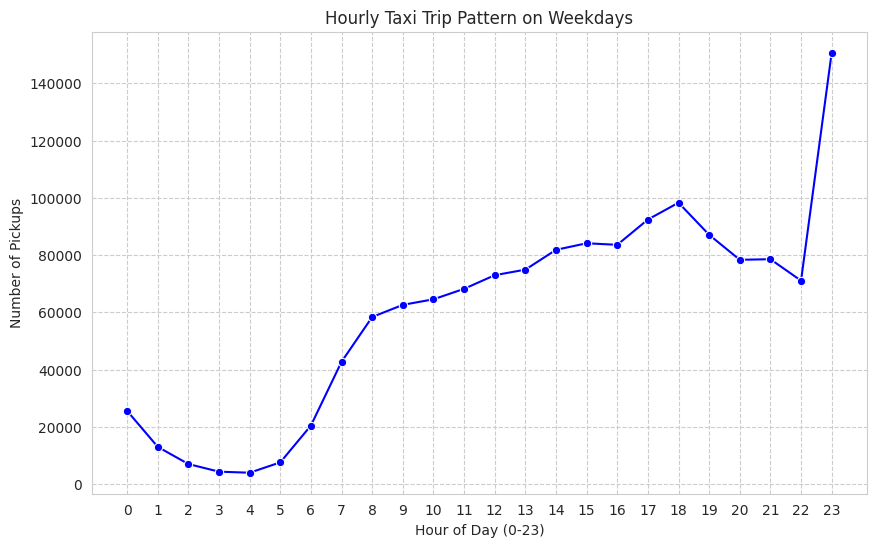

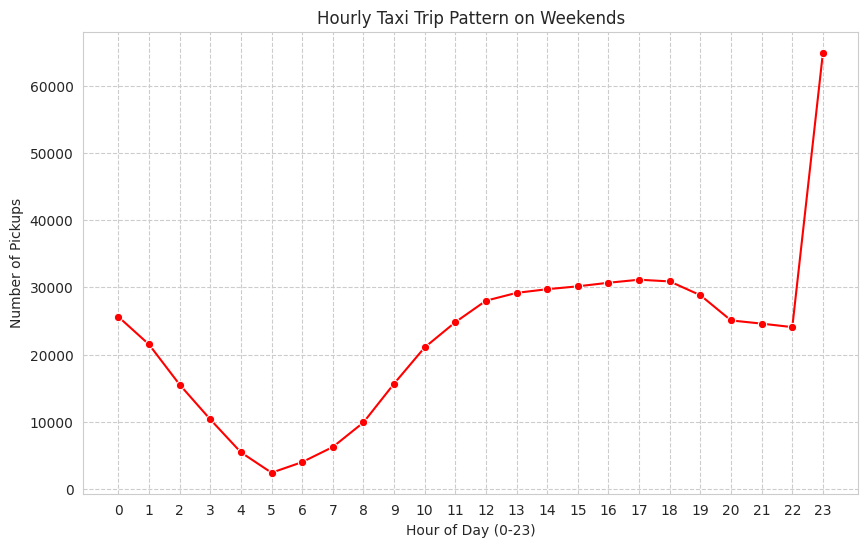


Separate hourly traffic pattern plots for Weekdays and Weekends completed.

Peak hours and counts:
Weekday Peak:
Hour: 23
Pickups: 150673

Weekend Peak:
Hour: 23
Pickups: 64934


In [ ]:
# Compare traffic trends for the week days and weekends

# Ensure 'tpep_pickup_datetime' and 'pickup_day_of_week' are available
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour # Needed for hourly comparison

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Create a new column to categorize each trip as 'Weekday' or 'Weekend'
df['day_type'] = df['pickup_day_of_week'].apply(lambda day: 'Weekday' if day in weekdays else 'Weekend')

print("\nCategorized days into Weekday/Weekend.")
print(df['day_type'].value_counts())

# Group by time of day category (Weekday/Weekend) and pickup hour, then count trips
hourly_trends_by_day_type = df.groupby(['pickup_hour', 'day_type']).size().unstack(level=1)

# Fill potential NaN values (hours where no trips occurred in a category) with 0
hourly_trends_by_day_type = hourly_trends_by_day_type.fillna(0)

# The columns are already 'Weekday' and 'Weekend' after unstacking
# Sort by hour (index)
hourly_trends_by_day_type = hourly_trends_by_day_type.sort_index(axis=0)

# Visualize the hourly pattern for weekdays and weekends on the same plot for comparison

# Set a consistent style for plots
sns.set_style("whitegrid")

# Plot the hourly pattern for weekdays
# Check if the 'Weekday' column exists
if 'Weekday' in hourly_trends_by_day_type.columns:
    plt.figure(figsize=(10, 6)) # Figure for Weekday plot
    sns.lineplot(x=hourly_trends_by_day_type.index, y=hourly_trends_by_day_type['Weekday'], marker='o', color='blue')
    plt.title('Hourly Taxi Trip Pattern on Weekdays')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(0, 24)) # Ensure all 24 hours are shown
    plt.grid(axis='both', linestyle='--')
    plt.show()
else:
    print("Warning: 'Weekday' column not found in hourly_trends_by_day_type. Cannot plot Weekday pattern.")


# Plot the hourly pattern for weekends
# Check if the 'Weekend' column exists
if 'Weekend' in hourly_trends_by_day_type.columns:
    plt.figure(figsize=(10, 6)) # Figure for Weekend plot
    sns.lineplot(x=hourly_trends_by_day_type.index, y=hourly_trends_by_day_type['Weekend'], marker='o', color='red')
    plt.title('Hourly Taxi Trip Pattern on Weekends')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(0, 24)) # Ensure all 24 hours are shown
    plt.grid(axis='both', linestyle='--')
    plt.show()
else:
    print("Warning: 'Weekend' column not found in hourly_trends_by_day_type. Cannot plot Weekend pattern.")

print("\nSeparate hourly traffic pattern plots for Weekdays and Weekends completed.")

# Optional: Print peak hours and counts numerically (same as before)
print("\nPeak hours and counts:")
if 'Weekday' in hourly_trends_by_day_type.columns:
    print("Weekday Peak:")
    print(f"Hour: {hourly_trends_by_day_type['Weekday'].idxmax()}")
    print(f"Pickups: {hourly_trends_by_day_type['Weekday'].max()}")
else:
    print("Weekday peak cannot be determined as column not found.")

if 'Weekend' in hourly_trends_by_day_type.columns:
    print("\nWeekend Peak:")
    print(f"Hour: {hourly_trends_by_day_type['Weekend'].idxmax()}")
    print(f"Pickups: {hourly_trends_by_day_type['Weekend'].max()}")
else:
     print("Weekend peak cannot be determined as column not found.")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.


Merged trip data with zone information to create 'df_with_zones'.
Shape of df_with_zones: (1973083, 30)

First 5 rows of df_with_zones:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
2         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
3         2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
4         2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.99         1.0           148            50             1   
1           1.05         1.0           161           161             1   
2           0.40         1.0            68            68             1   
3           1.66         1.0           114           186             1   
4           2.45         1.0           164

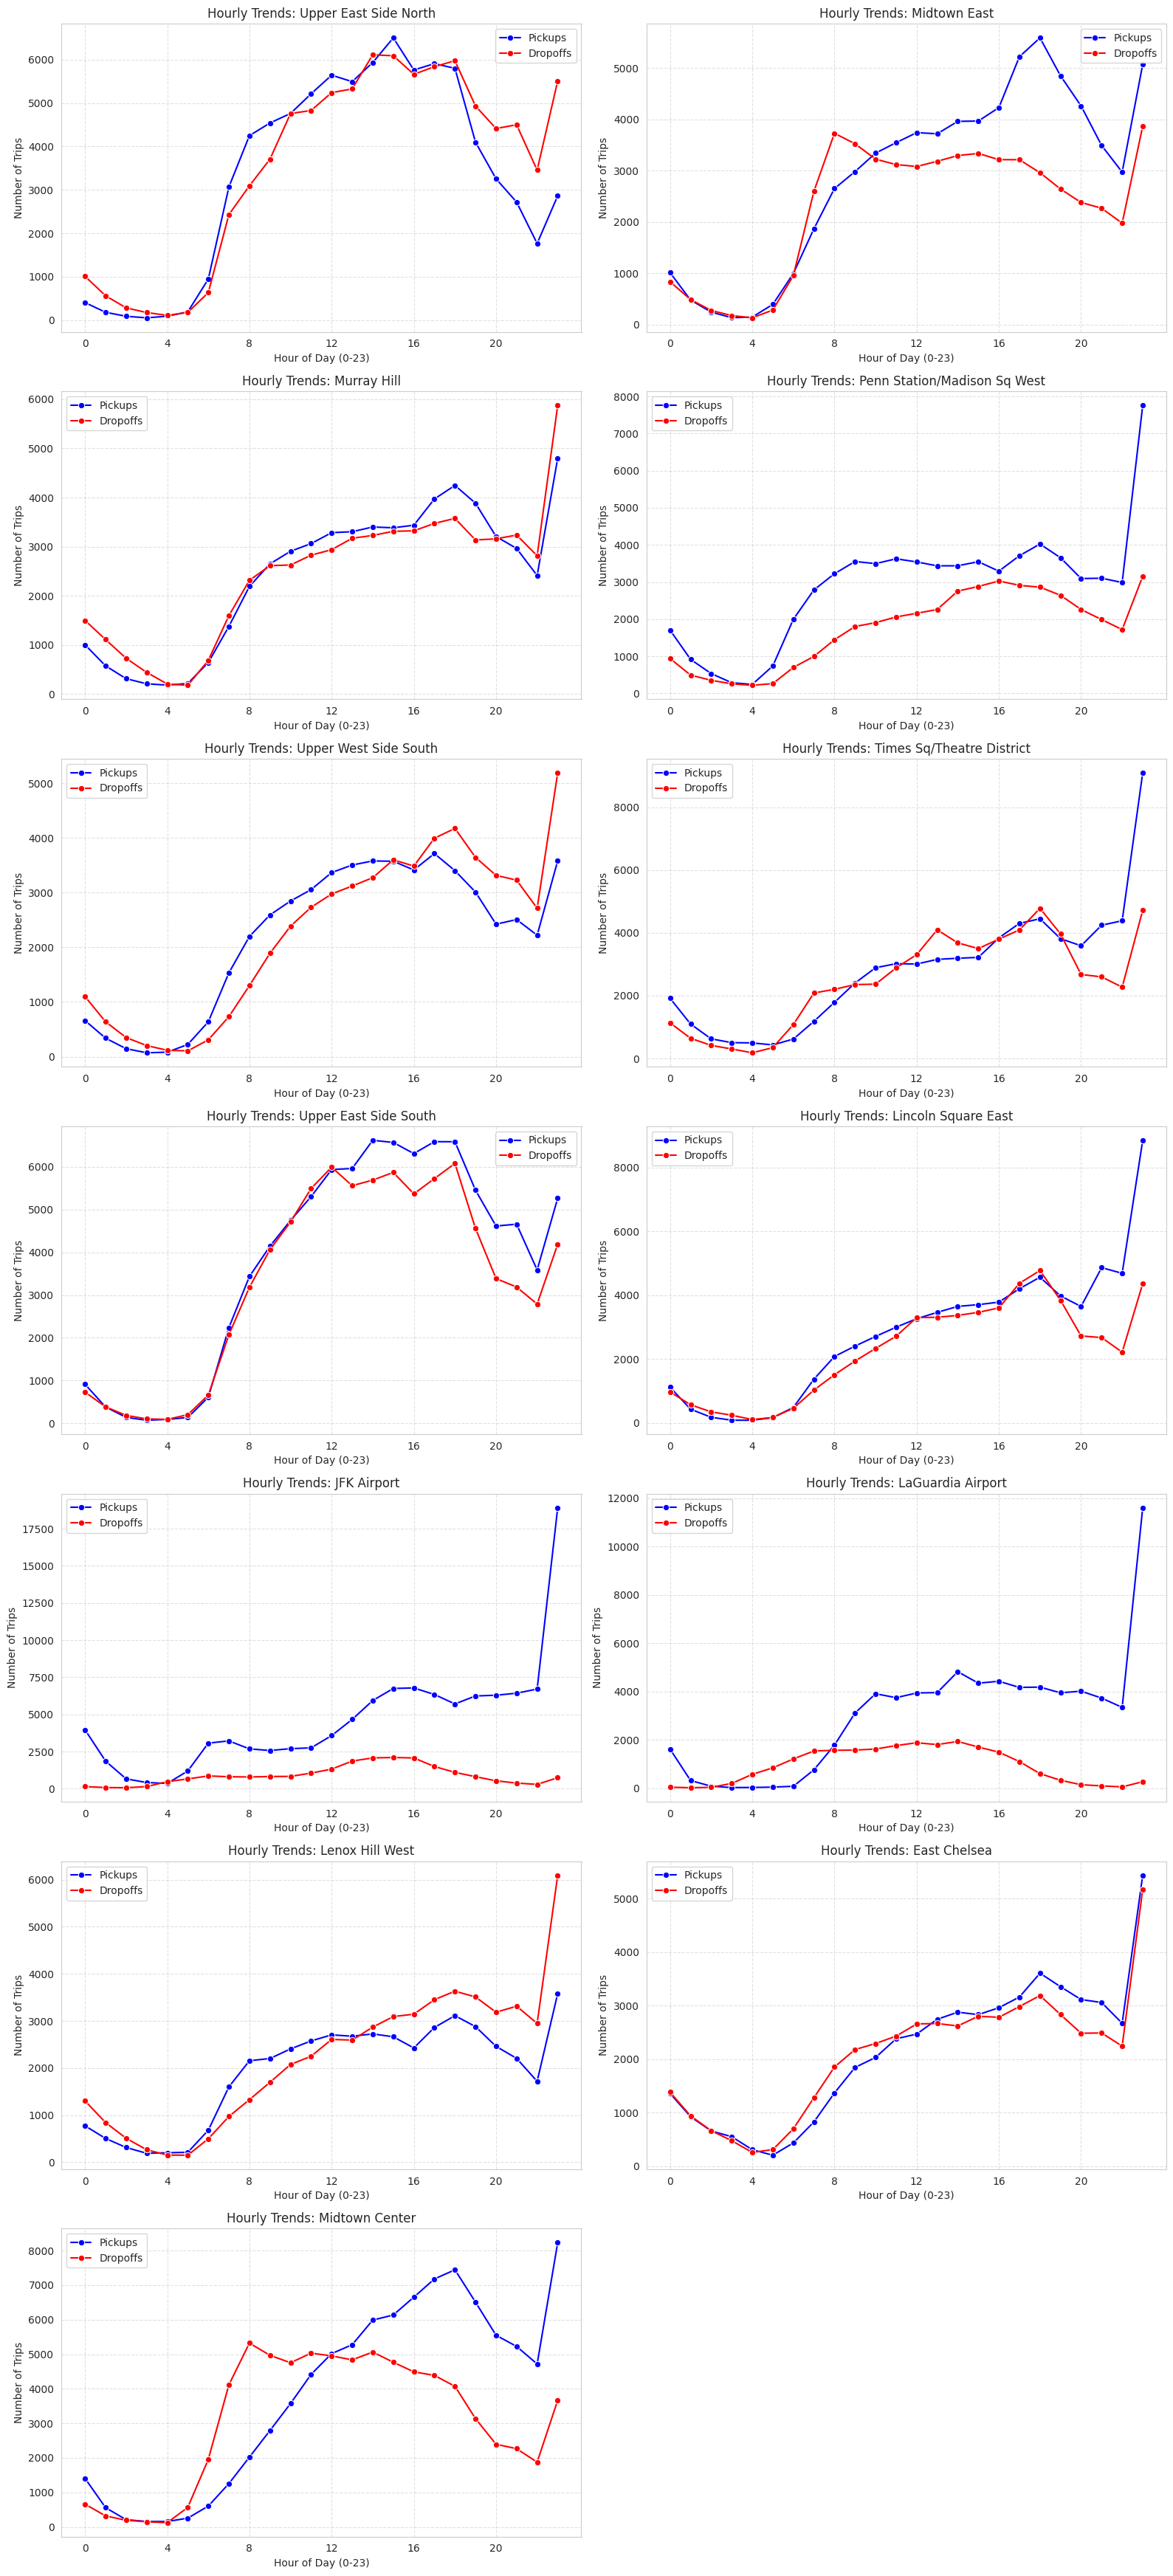


Analysis and visualization of hourly trends in top zones completed.


In [ ]:
# Find top 10 pickup and dropoff zones

# Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs.
# Show pickup and dropoff trends in these zones.

# We need the DataFrame containing trip data with zone information.
# Assuming you are using 'df_with_zones' or a similar DataFrame that includes
# 'PULocationID', 'DOLocationID', 'pickup_hour', and zone names (like 'zone', 'Borough').
# We also need the original zones GeoDataFrame for mapping LocationIDs to zone names.

# Ensure necessary columns and DataFrames are available

# Check if 'df' DataFrame exists (created in previous steps)
if 'df' not in locals():
    print("Error: 'df' DataFrame not found. Please run the data loading and cleaning steps first.")
    # You might want to raise an error or exit here if df is essential.
    # For now, we'll just print a message and assume df exists from prior execution.

# Check if 'zones' GeoDataFrame exists (read from shapefile)
if 'zones' not in locals():
    print("Error: 'zones' GeoDataFrame not found. Please read the shapefile (e.g., taxi_zones.shp) first.")
    # You might need to add code here to read the shapefile if it wasn't included in the provided context.
    # Example: zones = gpd.read_file('path/to/taxi_zones.shp')
    # For now, we'll assume zones exists from prior execution.

# --- Merge df with zones to get zone names ---
# Merge 'df' with 'zones' on PULocationID to get pickup zone information
# Use suffixes to distinguish columns if names overlap (like 'zone', 'Borough')
df_with_zones = pd.merge(df, zones[['LocationID', 'zone', 'borough']],
                         left_on='PULocationID', right_on='LocationID', how='left',
                         suffixes=('', '_dropoff')) # Adding suffix for consistency, though not strictly needed yet

# Rename the merged columns to be clear they are for pickup
df_with_zones = df_with_zones.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'})

# Drop the redundant LocationID column from the merge
df_with_zones = df_with_zones.drop(columns=['LocationID'])


# Merge again with 'zones' on DOLocationID to get dropoff zone information
df_with_zones = pd.merge(df_with_zones, zones[['LocationID', 'zone', 'borough']],
                         left_on='DOLocationID', right_on='LocationID', how='left',
                         suffixes=('', '_dropoff'))

# Rename the merged columns to be clear they are for dropoff
df_with_zones = df_with_zones.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'})

# Drop the redundant LocationID column from the second merge
df_with_zones = df_with_zones.drop(columns=['LocationID'])

print("\nMerged trip data with zone information to create 'df_with_zones'.")
print(f"Shape of df_with_zones: {df_with_zones.shape}")
print("\nFirst 5 rows of df_with_zones:")
print(df_with_zones.head())


print("\nIdentifying top 10 zones with high hourly pickups and dropoffs.")

# --- Find Top 10 Pickup Zones ---

# Group by Pickup Zone (name) and pickup hour, then count trips
# Use the newly created 'pickup_zone' column
hourly_pickup_trends_by_zone = df_with_zones.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='pickup_count')

# Calculate the total number of pickups for each zone across all hours
total_pickups_by_zone = hourly_pickup_trends_by_zone.groupby('pickup_zone')['pickup_count'].sum()

# Identify the top 10 zones with the highest total pickups
top_10_pickup_zones = total_pickups_by_zone.sort_values(ascending=False).head(10).index.tolist()

print(f"\nTop 10 Pickup Zones (based on total pickups): {top_10_pickup_zones}")

# --- Find Top 10 Dropoff Zones ---

# Group by Dropoff Zone (name) and pickup hour, then count trips
# Use the newly created 'dropoff_zone' column
hourly_dropoff_trends_by_zone = df_with_zones.groupby(['dropoff_zone', 'pickup_hour']).size().reset_index(name='dropoff_count')


# Calculate the total number of dropoffs for each Zone
total_dropoffs_by_zone = hourly_dropoff_trends_by_zone.groupby('dropoff_zone')['dropoff_count'].sum()

# Identify the top 10 zones with the highest total dropoffs
top_10_dropoff_zones = total_dropoffs_by_zone.sort_values(ascending=False).head(10).index.tolist()

print(f"Top 10 Dropoff Zones (based on total dropoffs): {top_10_dropoff_zones}")


# --- Show Hourly Trends in Top Zones ---

# Combine the top 10 pickup and top 10 dropoff zone names for plotting
# Use a set to get unique zone names
top_zones_for_plotting = list(set(top_10_pickup_zones + top_10_dropoff_zones))

# Remove 'Unknown Zone' or NaN if they appear in top zones due to failed merges
top_zones_for_plotting = [zone for zone in top_zones_for_plotting if pd.notna(zone) and zone != 'Unknown Zone']


print(f"\nAnalyzing hourly trends for the following top zones: {top_zones_for_plotting}")

# Filter the hourly trends data to include only these top zones

# Filter hourly pickup trends using 'pickup_zone'
top_zones_hourly_pickups = hourly_pickup_trends_by_zone[hourly_pickup_trends_by_zone['pickup_zone'].isin(top_zones_for_plotting)].copy()

# Filter hourly dropoff trends using 'dropoff_zone'
top_zones_hourly_dropoffs = hourly_dropoff_trends_by_zone[hourly_dropoff_trends_by_zone['dropoff_zone'].isin(top_zones_for_plotting)].copy()


# Now, visualize the hourly trends for each of these top zones
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set_style("whitegrid")

# Define number of plots per row (e.g., 2 plots per row)
n_cols = 2
n_rows = (len(top_zones_for_plotting) + n_cols - 1) // n_cols # Calculate number of rows needed

# Check if there are any zones to plot
if not top_zones_for_plotting:
    print("No valid top zones found to plot.")
else:
    plt.figure(figsize=(n_cols * 8, n_rows * 5)) # Adjust figure size based on number of plots

    # Loop through each top zone and plot its hourly pickup and dropoff trends
    for i, zone_name in enumerate(top_zones_for_plotting):
        ax = plt.subplot(n_rows, n_cols, i + 1) # Create subplot

        # Filter data for the current zone
        zone_pickup_data = top_zones_hourly_pickups[top_zones_hourly_pickups['pickup_zone'] == zone_name]
        zone_dropoff_data = top_zones_hourly_dropoffs[top_zones_hourly_dropoffs['dropoff_zone'] == zone_name]

        # Plot pickup trend
        if not zone_pickup_data.empty:
            sns.lineplot(x='pickup_hour', y='pickup_count', data=zone_pickup_data, marker='o', label='Pickups', color='blue', ax=ax)
        else:
            ax.plot([], [], label='Pickups (No data)', color='blue') # Plot empty line to include in legend

        # Plot dropoff trend
        if not zone_dropoff_data.empty:
            sns.lineplot(x='pickup_hour', y='dropoff_count', data=zone_dropoff_data, marker='o', label='Dropoffs', color='red', ax=ax)
        else:
             ax.plot([], [], label='Dropoffs (No data)', color='red') # Plot empty line to include in legend


        ax.set_title(f'Hourly Trends: {zone_name}')
        ax.set_xlabel('Hour of Day (0-23)')
        ax.set_ylabel('Number of Trips')
        ax.set_xticks(range(0, 24, 4)) # Show ticks every 4 hours
        ax.grid(axis='both', linestyle='--', alpha=0.6)
        ax.legend()

    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show()

print("\nAnalysis and visualization of hourly trends in top zones completed.")

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# To calculate the pickup/dropoff ratio for each zone, we need:
# - The total number of pickups in each zone.
# - The total number of dropoffs in each zone.

# We have already calculated total pickup counts per zone (total_pickups_by_zone)
# and total dropoff counts per zone name (total_dropoffs_by_zone) in the previous cell.

# Ensure these are available:
# - total_pickups_by_zone (Series: index=zone name, values=pickup count)
# - total_dropoffs_by_zone (Series: index=zone name, values=dropoff count)
# - zones (GeoDataFrame with LocationID and zone name)

print("\nCalculating pickup/dropoff ratios per zone.")

# We have total_pickups_by_zone and total_dropoffs_by_zone, both indexed by zone name.
# We can directly merge these two Series into a DataFrame.

# Convert Series to DataFrames for merging
pickups_df = total_pickups_by_zone.reset_index()
pickups_df.columns = ['zone', 'pickup_count']

dropoffs_df = total_dropoffs_by_zone.reset_index()
dropoffs_df.columns = ['zone', 'dropoff_count']

# Merge pickup and dropoff counts on the zone name
# Use an outer merge to include all zones, even if they have 0 pickups or 0 dropoffs
zone_counts_df = pd.merge(pickups_df, dropoffs_df, on='zone', how='outer')


# Fill NaN counts with 0 for zones that might only have pickups or only dropoffs
zone_counts_df['pickup_count'] = zone_counts_df['pickup_count'].fillna(0).astype(int)
zone_counts_df['dropoff_count'] = zone_counts_df['dropoff_count'].fillna(0).astype(int)


print("\nDataFrame with total pickup and dropoff counts per zone (first 5):")
print(zone_counts_df.head())


# Calculate the Pickup/Dropoff Ratio
# Ratio = Total Pickups / Total Dropoffs
# Handle cases where Total Dropoffs is 0 to avoid division by zero.
# We can replace the ratio with NaN.
# A common approach is to add a small epsilon to the denominator or replace 0 dropoffs with NaN.
# Let's replace division by zero results with NaN.

# Using .loc to avoid SettingWithCopyWarning if zone_counts_df was a slice
zone_counts_df.loc[zone_counts_df['dropoff_count'] != 0, 'pickup_dropoff_ratio'] = zone_counts_df['pickup_count'] / zone_counts_df['dropoff_count']
zone_counts_df.loc[zone_counts_df['dropoff_count'] == 0, 'pickup_dropoff_ratio'] = np.nan # Set ratio to NaN where dropoffs are 0

# Handle cases where both pickup and dropoff counts are 0 (ratio is undefined, already handled by above logic)
# For zones with 0 pickups and non-zero dropoffs, ratio will be 0. This is correct.


print("\nDataFrame with Pickup/Dropoff Ratio per zone (first 5):")
print(zone_counts_df.head())


# Sort the DataFrame by the ratio to find top/bottom zones
# Drop rows with NaN ratio before sorting if you don't want them in top/bottom lists
# NaN ratios occur for zones with 0 dropoffs. These zones have infinite pickup dominance,
# but excluding them makes the 'top 10' list more interpretable for zones with *some* dropoffs.
zone_ratios_sorted = zone_counts_df.dropna(subset=['pickup_dropoff_ratio']).sort_values(by='pickup_dropoff_ratio')

# Identify top 10 zones with the highest ratio (more pickups than dropoffs)
# Use n=10 for clarity
top_10_ratio_zones = zone_ratios_sorted.tail(10) # tail() gets the last (highest ratio) rows

print("\nTop 10 Zones with Highest Pickup/Dropoff Ratio (More Pickups):")
print(top_10_ratio_zones[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']].round(2))


# Identify bottom 10 zones with the lowest ratio (more dropoffs than pickups)
# Use n=10 for clarity
bottom_10_ratio_zones = zone_ratios_sorted.head(10) # head() gets the first (lowest ratio) rows

print("\nBottom 10 Zones with Lowest Pickup/Dropoff Ratio (More Dropoffs):")
print(bottom_10_ratio_zones[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']].round(2))

# You can visualize these on the map later if you merge the ratio back to the zones GeoDataFrame.
# For now, the lists identify the zones.


Calculating pickup/dropoff ratios per zone.

DataFrame with total pickup and dropoff counts per zone (first 5):
                      zone  pickup_count  dropoff_count
0  Allerton/Pelham Gardens            40            193
1            Alphabet City          2147           7903
2            Arden Heights            13             58
3  Arrochar/Fort Wadsworth            24             65
4                  Astoria           950           6100

DataFrame with Pickup/Dropoff Ratio per zone (first 5):
                      zone  pickup_count  dropoff_count  pickup_dropoff_ratio
0  Allerton/Pelham Gardens            40            193              0.207254
1            Alphabet City          2147           7903              0.271669
2            Arden Heights            13             58              0.224138
3  Arrochar/Fort Wadsworth            24             65              0.369231
4                  Astoria           950           6100              0.155738

Top 10 Zones with Highest

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Ensure 'df_with_zones' DataFrame is available and 'pickup_hour' is correctly extracted
# (Assuming 'df_with_zones' was created and 'pickup_hour' was extracted in previous steps)

# Filter the DataFrame to include only trips that started during night hours
night_trips_df = df_with_zones[df_with_zones['pickup_hour'].isin(night_hours)].copy()

print(f"\nAnalyzing {night_trips_df.shape[0]} trips occurring during night hours (11 PM - 5 AM).")


# --- Find Top 10 Pickup Zones during Night Hours ---

# Group the night trips by pickup zone and count
night_pickup_counts_by_zone = night_trips_df.groupby('pickup_zone').size().sort_values(ascending=False)

# Get the top 10 pickup zones for night hours
top_10_night_pickup_zones = night_pickup_counts_by_zone.head(10)

print("\nTop 10 Pickup Zones during Night Hours:")
print(top_10_night_pickup_zones)


# --- Find Top 10 Dropoff Zones during Night Hours ---

# Group the night trips by dropoff zone and count
night_dropoff_counts_by_zone = night_trips_df.groupby('dropoff_zone').size().sort_values(ascending=False)

# Get the top 10 dropoff zones for night hours
top_10_night_dropoff_zones = night_dropoff_counts_by_zone.head(10)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_10_night_dropoff_zones)

print("\nAnalysis of top 10 pickup and dropoff zones during night hours completed.")


Analyzing 358290 trips occurring during night hours (11 PM - 5 AM).

Top 10 Pickup Zones during Night Hours:
pickup_zone
JFK Airport                     27362
East Village                    21567
West Village                    17797
Clinton East                    16668
Times Sq/Theatre District       14172
LaGuardia Airport               13734
Greenwich Village South         12793
Lower East Side                 12629
Penn Station/Madison Sq West    12178
Midtown Center                  10977
dtype: int64

Top 10 Dropoff Zones during Night Hours:
dropoff_zone
East Village                 12605
Clinton East                 11087
Murray Hill                  10048
Gramercy                      9394
Lenox Hill West               9320
East Chelsea                  9204
Yorkville West                8539
Upper East Side North         7823
Times Sq/Theatre District     7749
Upper West Side South         7705
dtype: int64

Analysis of top 10 pickup and dropoff zones during night hours com

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Ensure 'df_with_zones' DataFrame is available and 'pickup_hour' is correctly extracted
# (Assuming 'df_with_zones' was created and 'pickup_hour' was extracted in previous steps)

# Filter DataFrame for night hours
night_trips_df = df_with_zones[df_with_zones['pickup_hour'].isin(night_hours)].copy()

# Filter DataFrame for daytime hours
daytime_trips_df = df_with_zones[~df_with_zones['pickup_hour'].isin(night_hours)].copy() # Use ~ to select rows NOT in night_hours


# Calculate total revenue (using 'total_amount') for night hours
# Ensure 'total_amount' column exists and is numeric (should be after cleaning)
if 'total_amount' not in night_trips_df.columns:
    print("Error: 'total_amount' column not found in the DataFrame.")
    # Handle error appropriately, maybe stop execution or add a placeholder.
    night_revenue = 0
else:
    night_revenue = night_trips_df['total_amount'].sum()

# Calculate total revenue for daytime hours
if 'total_amount' not in daytime_trips_df.columns:
     print("Error: 'total_amount' column not found in the DataFrame.")
     # Handle error appropriately
     daytime_revenue = 0
else:
    daytime_revenue = daytime_trips_df['total_amount'].sum()


# Calculate the total revenue for the entire period (both night and day)
total_revenue = df_with_zones['total_amount'].sum() # Or night_revenue + daytime_revenue


# Calculate revenue share
if total_revenue > 0:
    night_revenue_share = (night_revenue / total_revenue) * 100
    daytime_revenue_share = (daytime_revenue / total_revenue) * 100
else:
    night_revenue_share = 0
    daytime_revenue_share = 0
    print("Warning: Total revenue is zero, revenue shares cannot be calculated.")


print(f"\nTotal Revenue (Night Hours): ${night_revenue:,.2f}")
print(f"Total Revenue (Daytime Hours): ${daytime_revenue:,.2f}")
print(f"Total Revenue (Overall): ${total_revenue:,.2f}")

print(f"\nRevenue Share (Night Hours): {night_revenue_share:.2f}%")
print(f"Revenue Share (Daytime Hours): {daytime_revenue_share:.2f}%")

# Optional: Verify the shares add up to 100%
print(f"Total Share Check: {night_revenue_share + daytime_revenue_share:.2f}%")

print("\nRevenue share analysis for nighttime and daytime hours completed.")


Total Revenue (Night Hours): $10,858,809.73
Total Revenue (Daytime Hours): $46,483,215.92
Total Revenue (Overall): $57,342,025.65

Revenue Share (Night Hours): 18.94%
Revenue Share (Daytime Hours): 81.06%
Total Share Check: 100.00%

Revenue share analysis for nighttime and daytime hours completed.


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
df_analysis = df_with_zones.copy() # Work on a copy to avoid modifying original df_with_zones unnecessarily

# Calculate fare per mile
df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']

# Replace infinite values (where trip_distance was 0 but fare_amount was non-zero) and NaNs (where both were 0) with NaN
df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)


# Calculate fare per mile per passenger
# Handle cases where passenger_count is zero to avoid division by zero.
# Based on previous cleaning, passenger_count should not be 0 anymore.
# However, let's add a check just in case.
if (df_analysis['passenger_count'] == 0).any():
    print("Warning: Found trips with passenger_count = 0. Excluding these from fare per passenger calculation.")
    # Replace 0 passenger counts with NaN for this calculation
    df_analysis['passenger_per_calculation'] = df_analysis['passenger_count'].replace(0, np.nan)
else:
    df_analysis['passenger_per_calculation'] = df_analysis['passenger_count']

# Calculate fare per mile per passenger, excluding rows where fare_per_mile or passenger_per_calculation is NaN
df_analysis['fare_per_mile_per_passenger'] = df_analysis['fare_per_mile'] / df_analysis['passenger_per_calculation']


# Now, group by passenger_count and find the average 'fare_per_mile_per_passenger'
# Exclude the temporary passenger_per_calculation column from the grouping
fare_analysis_by_passenger_count = df_analysis.dropna(subset=['fare_per_mile_per_passenger']).groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Sort by passenger_count for better readability
fare_analysis_by_passenger_count = fare_analysis_by_passenger_count.sort_values(by='passenger_count')


print("\nAverage Fare per Mile per Passenger by Passenger Count:")
print(fare_analysis_by_passenger_count.round(2))

# You might also want to look at the count of trips for each passenger count to understand the sample size
print("\nNumber of trips by Passenger Count (used in analysis):")
print(df_analysis.dropna(subset=['fare_per_mile_per_passenger'])['passenger_count'].value_counts().sort_index())



/tmp/ipython-input-99-43209325.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)



Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                        10.99
1              2.0                         6.45
2              3.0                         4.04
3              4.0                         4.15
4              5.0                         1.68
5              6.0                         1.34

Number of trips by Passenger Count (used in analysis):
passenger_count
1.0    1460936
2.0     299043
3.0      74356
4.0      40907
5.0      25902
6.0      16749
Name: count, dtype: int64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

df_analysis = df_with_zones.copy() # Work on a copy


# Calculate fare per mile, handling zero distances by making the result NaN
df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']
df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fare_per_mile is NaN before calculating averages
df_analysis_valid_fare_per_mile = df_analysis.dropna(subset=['fare_per_mile'])

print(f"\nCalculating average fare per mile for {df_analysis_valid_fare_per_mile.shape[0]} trips with valid trip_distance.")


# --- Average Fare Per Mile by Day of the Week ---

# Ensure 'pickup_day_of_week' is available
if 'pickup_day_of_week' not in df_analysis_valid_fare_per_mile.columns:
    print("Error: 'pickup_day_of_week' column not found. Please extract day of week from pickup datetime.")
    # Add code to extract day of week if needed:
    # df_analysis_valid_fare_per_mile['pickup_day_of_week'] = df_analysis_valid_fare_per_mile['tpep_pickup_datetime'].dt.day_name()

# Group by day of the week and calculate the mean fare per mile
average_fare_per_mile_by_day = df_analysis_valid_fare_per_mile.groupby('pickup_day_of_week')['fare_per_mile'].mean()

# Reindex to ensure standard day order (Monday to Sunday) for consistent plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_fare_per_mile_by_day = average_fare_per_mile_by_day.reindex(day_order)


print("\nAverage Fare Per Mile by Day of the Week:")
print(average_fare_per_mile_by_day.round(2))


/tmp/ipython-input-100-3033315078.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)



Calculating average fare per mile for 1948383 trips with valid trip_distance.

Average Fare Per Mile by Day of the Week:
pickup_day_of_week
Monday       10.92
Tuesday      12.50
Wednesday    10.76
Thursday     10.97
Friday       10.71
Saturday     10.74
Sunday       13.15
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors


df_analysis = df_with_zones.copy() # Work on a copy


# Calculate fare per mile, handling zero distances by making the result NaN
df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']
df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fare_per_mile is NaN before calculating averages
df_analysis_valid_fare_per_mile = df_analysis.dropna(subset=['fare_per_mile']).copy() # Use .copy() after filtering


print(f"\nCalculating average fare per mile for different vendors using {df_analysis_valid_fare_per_mile.shape[0]} trips with valid trip_distance.")


# --- Average Fare Per Mile by VendorID ---

# Ensure 'VendorID' is available
if 'VendorID' not in df_analysis_valid_fare_per_mile.columns:
    print("Error: 'VendorID' column not found in the DataFrame.")
    # Handle error appropriately.
else:
    # Check the unique values in VendorID to understand what vendors are present
    print(f"\nUnique VendorIDs in the data: {df_analysis_valid_fare_per_mile['VendorID'].unique()}")
    print(f"Value counts for VendorID:\n{df_analysis_valid_fare_per_mile['VendorID'].value_counts()}")


    # Group by VendorID and calculate the mean fare per mile
    average_fare_per_mile_by_vendor = df_analysis_valid_fare_per_mile.groupby('VendorID')['fare_per_mile'].mean().reset_index()

    # Sort by VendorID for consistent display
    average_fare_per_mile_by_vendor = average_fare_per_mile_by_vendor.sort_values(by='VendorID')


    print("\nAverage Fare Per Mile by VendorID:")
    print(average_fare_per_mile_by_vendor.round(2))

/tmp/ipython-input-101-890734059.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)



Calculating average fare per mile for different vendors using 1948383 trips with valid trip_distance.

Unique VendorIDs in the data: [2 1]
Value counts for VendorID:
VendorID
2    1441318
1     507065
Name: count, dtype: int64

Average Fare Per Mile by VendorID:
   VendorID  fare_per_mile
0         1           8.05
1         2          12.51


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

/tmp/ipython-input-102-3532307903.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)



Analyzing fare rates by distance tiers for 1948383 trips with valid trip_distance.

Distribution of trips across distance tiers:
distance_tier
0-2 miles    1064637
2-5 miles     537142
>5 miles      346604
Name: count, dtype: int64


/tmp/ipython-input-102-3532307903.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_per_mile_by_vendor_tier = df_analysis_valid_fare_per_mile.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()



Average Fare Per Mile by Vendor ID and Distance Tier:
   VendorID distance_tier  fare_per_mile
0         1     0-2 miles           9.88
1         1     2-5 miles           6.32
2         1      >5 miles           4.41
3         2     0-2 miles          18.37
4         2     2-5 miles           6.49
5         2      >5 miles           4.49


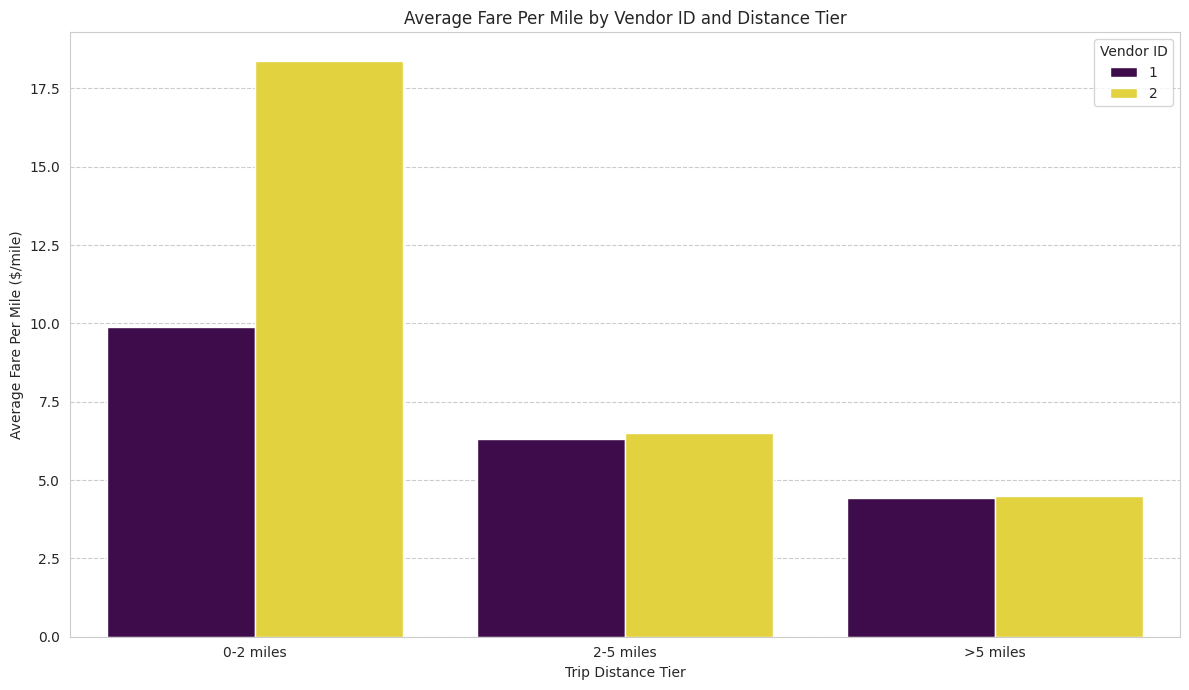


Analysis of fare rates by vendor and distance tiers completed.


In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

distance_bins = [0, 2, 5, np.inf] # Define the bin edges (0 to 2, 2 to 5, 5 to infinity)
distance_labels = ['0-2 miles', '2-5 miles', '>5 miles'] # Labels for the bins


# Ensure necessary columns exist and are numeric: 'fare_amount', 'trip_distance', 'VendorID'.
# Assuming 'df_with_zones' DataFrame (or just 'df') contains these columns.
# Using 'df_with_zones' to be consistent with prior cells.

df_analysis = df_with_zones.copy() # Work on a copy


# Calculate fare per mile, handling zero distances by making the result NaN
df_analysis['fare_per_mile'] = df_analysis['fare_amount'] / df_analysis['trip_distance']
df_analysis['fare_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fare_per_mile is NaN before proceeding
df_analysis_valid_fare_per_mile = df_analysis.dropna(subset=['fare_per_mile']).copy() # Use .copy() after filtering

print(f"\nAnalyzing fare rates by distance tiers for {df_analysis_valid_fare_per_mile.shape[0]} trips with valid trip_distance.")


# Create a new column 'distance_tier' based on 'trip_distance'
# Use pd.cut to categorize distances into the defined bins
df_analysis_valid_fare_per_mile['distance_tier'] = pd.cut(
    df_analysis_valid_fare_per_mile['trip_distance'],
    bins=distance_bins,
    labels=distance_labels,
    include_lowest=True, # Include the lowest value (0)
    right=True # Bins are (min, max], so 0-2 miles includes 2 miles
)

# Check the distribution of trips across the new distance tiers
print("\nDistribution of trips across distance tiers:")
print(df_analysis_valid_fare_per_mile['distance_tier'].value_counts().sort_index())


# --- Compare Average Fare Per Mile by Vendor and Distance Tier ---

# Group by both 'VendorID' and 'distance_tier' and calculate the mean fare per mile
average_fare_per_mile_by_vendor_tier = df_analysis_valid_fare_per_mile.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Pivot the table for easier comparison and plotting, if desired
# pivot_table = average_fare_per_mile_by_vendor_tier.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')


print("\nAverage Fare Per Mile by Vendor ID and Distance Tier:")
print(average_fare_per_mile_by_vendor_tier.round(2))


# Visualize the comparison using a grouped bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID', # Use hue to separate bars by vendor
    data=average_fare_per_mile_by_vendor_tier,
    palette='viridis',
    order=distance_labels # Ensure the order of x-axis bars matches the distance tiers
)
plt.title('Average Fare Per Mile by Vendor ID and Distance Tier')
plt.xlabel('Trip Distance Tier')
plt.ylabel('Average Fare Per Mile ($/mile)')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

print("\nAnalysis of fare rates by vendor and distance tiers completed.")

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


df_analysis = df_with_zones.copy() # Work on a copy


# Define the base amount for tip calculation
# Handle potential NaN values in the base components by filling with 0
base_for_tip = (
    df_analysis['fare_amount'].fillna(0) +
    df_analysis['extra'].fillna(0) +
    df_analysis['mta_tax'].fillna(0) +
    df_analysis['tolls_amount'].fillna(0) +
    df_analysis['improvement_surcharge'].fillna(0) +
    df_analysis['congestion_surcharge'].fillna(0)
)

# Add the airport fee component, using the combined column if it exists
if 'combined_airport_fee' in df_analysis.columns:
    base_for_tip += df_analysis['combined_airport_fee'].fillna(0)
elif 'airport_fee' in df_analysis.columns:
     base_for_tip += df_analysis['airport_fee'].fillna(0)


# Calculate tip percentage
# Handle cases where the base amount is zero to avoid division by zero.
# If base amount is 0, tip percentage is undefined or 0 if tip_amount is also 0.
# Let's set tip percentage to NaN if the base amount is 0.
df_analysis['tip_percentage'] = (df_analysis['tip_amount'] / base_for_tip) * 100

# Replace infinite values (where base_for_tip was 0 but tip_amount was non-zero - suspicious) and NaNs (where both were 0) with NaN
df_analysis['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)

# For trips where base_for_tip is 0 and tip_amount is also 0, the calculation results in NaN.
# We could consider these as 0% tip trips if payment_type is cash or no charge,
# but the problem specifically mentions credit card tips. Let's exclude NaNs for clarity in percentage comparison.

# Drop rows where tip_percentage is NaN for comparison
df_analysis_valid_tip = df_analysis.dropna(subset=['tip_percentage']).copy()


# Define the two groups: tip percentage < 10% and tip percentage > 25%
low_tip_trips = df_analysis_valid_tip[df_analysis_valid_tip['tip_percentage'] < 10].copy()
high_tip_trips = df_analysis_valid_tip[df_analysis_valid_tip['tip_percentage'] > 25].copy()

print(f"\nComparing {low_tip_trips.shape[0]} trips with <10% tip to {high_tip_trips.shape[0]} trips with >25% tip.")


# --- Analysis and Comparison ---

print("\nAnalysis of Low Tip (<10%) Trips:")
print(low_tip_trips.describe())
print("\nValue counts for key categorical columns in Low Tip trips:")
print("Payment Type:\n", low_tip_trips['payment_type'].value_counts(normalize=True).mul(100).round(2))
print("RateCodeID:\n", low_tip_trips['RatecodeID'].value_counts(normalize=True).mul(100).round(2))
print("Passenger Count:\n", low_tip_trips['passenger_count'].value_counts(normalize=True).mul(100).round(2))


print("\nAnalysis of High Tip (>25%) Trips:")
print(high_tip_trips.describe())
print("\nValue counts for key categorical columns in High Tip trips:")
print("Payment Type:\n", high_tip_trips['payment_type'].value_counts(normalize=True).mul(100).round(2))
print("RateCodeID:\n", high_tip_trips['RatecodeID'].value_counts(normalize=True).mul(100).round(2))
print("Passenger Count:\n", high_tip_trips['passenger_count'].value_counts(normalize=True).mul(100).round(2))



/tmp/ipython-input-104-657741920.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)



Comparing 617408 trips with <10% tip to 93470 trips with >25% tip.

Analysis of Low Tip (<10%) Trips:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  617408.000000                      617408                      617408   
mean        1.697234  2023-06-29 08:48:37.683640  2023-06-29 09:07:24.053271   
min         1.000000         2023-01-01 00:03:01         2023-01-01 00:09:35   
25%         1.000000  2023-04-01 19:15:40.750000  2023-04-01 19:32:58.500000   
50%         2.000000         2023-06-23 22:16:06         2023-06-23 22:31:12   
75%         2.000000         2023-09-29 22:35:39  2023-09-29 22:57:25.500000   
max         2.000000         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.459455                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    617408.000000  617408.000000  617408.000000  617408.000000   
mean          1.391741       3.689

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days

df_analysis = df_with_zones.copy()


# Ensure 'pickup_hour' and 'pickup_day_of_week' columns exist.
if 'pickup_hour' not in df_analysis.columns:
     print("Error: 'pickup_hour' column not found. Please extract hour from pickup datetime.")
     # Add code to extract hour if needed:
     # df_analysis['pickup_hour'] = df_analysis['tpep_pickup_datetime'].dt.hour

if 'pickup_day_of_week' not in df_analysis.columns:
      print("Error: 'pickup_day_of_week' column not found. Please extract day of week from pickup datetime.")
      # Add code to extract day of week if needed:
      # df_analysis['pickup_day_of_week'] = df_analysis['tpep_pickup_datetime'].dt.day_name()

# Ensure 'passenger_count' is available and cleaned (non-negative, non-zero, within reasonable limits)
if 'passenger_count' not in df_analysis.columns:
    print("Error: 'passenger_count' column not found.")


print("\nAnalyzing how passenger count varies across hours and days.")


# --- Passenger Count Variation by Hour of the Day ---

# Group by pickup hour and calculate the mean passenger count
average_passenger_count_by_hour = df_analysis.groupby('pickup_hour')['passenger_count'].mean()

# Sort by hour index
average_passenger_count_by_hour = average_passenger_count_by_hour.sort_index()

print("\nAverage Passenger Count by Hour of the Day:")
print(average_passenger_count_by_hour.round(2))



Analyzing how passenger count varies across hours and days.

Average Passenger Count by Hour of the Day:
pickup_hour
0     1.42
1     1.42
2     1.44
3     1.44
4     1.39
5     1.28
6     1.24
7     1.26
8     1.27
9     1.30
10    1.34
11    1.35
12    1.36
13    1.37
14    1.37
15    1.39
16    1.39
17    1.38
18    1.36
19    1.38
20    1.39
21    1.41
22    1.42
23    1.41
Name: passenger_count, dtype: float64


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
df_analysis = df_with_zones.copy()

# Ensure necessary columns exist
if 'pickup_zone' not in df_analysis.columns:
    print("Error: 'pickup_zone' column not found. Please merge with zones GeoDataFrame first.")
if 'dropoff_zone' not in df_analysis.columns:
    print("Error: 'dropoff_zone' column not found. Please merge with zones GeoDataFrame first.")
if 'passenger_count' not in df_analysis.columns:
    print("Error: 'passenger_count' column not found.")


print("\nAnalyzing how passenger count varies across zones.")


# --- Passenger Count Variation by Pickup Zone ---

# Group by pickup zone and calculate the mean passenger count
average_passenger_count_by_pickup_zone = df_analysis.groupby('pickup_zone')['passenger_count'].mean().reset_index()

# Sort by average passenger count (descending) to see zones with highest counts
average_passenger_count_by_pickup_zone = average_passenger_count_by_pickup_zone.sort_values(by='passenger_count', ascending=False)

print("\nAverage Passenger Count by Pickup Zone (Top 10):")
print(average_passenger_count_by_pickup_zone.head(10).round(2))

print("\nAverage Passenger Count by Pickup Zone (Bottom 10):")
print(average_passenger_count_by_pickup_zone.tail(10).round(2))


# --- Passenger Count Variation by Dropoff Zone ---

# Group by dropoff zone and calculate the mean passenger count
average_passenger_count_by_dropoff_zone = df_analysis.groupby('dropoff_zone')['passenger_count'].mean().reset_index()

# Sort by average passenger count (descending) to see zones with highest counts
average_passenger_count_by_dropoff_zone = average_passenger_count_by_dropoff_zone.sort_values(by='passenger_count', ascending=False)

print("\nAverage Passenger Count by Dropoff Zone (Top 10):")
print(average_passenger_count_by_dropoff_zone.head(10).round(2))

print("\nAverage Passenger Count by Dropoff Zone (Bottom 10):")
print(average_passenger_count_by_dropoff_zone.tail(10).round(2))



Analyzing how passenger count varies across zones.

Average Passenger Count by Pickup Zone (Top 10):
                      pickup_zone  passenger_count
3         Arrochar/Fort Wadsworth             1.88
195             Rossville/Woodrow             1.80
186                      Red Hook             1.78
9                    Battery Park             1.71
53                   Country Club             1.67
169           Ocean Parkway South             1.67
59             DUMBO/Vinegar Hill             1.55
251            World Trade Center             1.55
185               Randalls Island             1.54
88   Flushing Meadows-Corona Park             1.53

Average Passenger Count by Pickup Zone (Bottom 10):
                   pickup_zone  passenger_count
163     New Dorp/Midland Beach             1.00
158         Morrisania/Melrose             1.00
212                  Stapleton             1.00
197  Saint George/New Brighton             1.00
205   South Beach/Dongan Hills             1

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


# Ensure 'zones' GeoDataFrame and 'df_with_zones' DataFrame are available.
if 'zones' not in locals():
     print("Error: 'zones' GeoDataFrame not found. Please load the taxi zones shapefile.")
     # Example: import geopandas as gpd; zones = gpd.read_file('path/to/taxi_zones.shp')
     # Stop execution or handle appropriately if zones is missing.

if 'df_with_zones' not in locals():
    print("Error: 'df_with_zones' DataFrame not found. Please run the data merging steps first.")
    # Stop execution or handle appropriately if df_with_zones is missing.


print("\nCreating 'zones_with_trips' GeoDataFrame and adding average passenger count.")

# --- Aggregate trip data by Zone ---

# Calculate the total number of pickups and dropoffs per zone
pickup_counts = df_with_zones.groupby('PULocationID').size().reset_index(name='total_pickups')
dropoff_counts = df_with_zones.groupby('DOLocationID').size().reset_index(name='total_dropoffs')

# Calculate the average passenger count for trips starting in each zone
# Handle cases where a zone has no pickups - mean would be NaN.
average_passenger_count_pickup = df_with_zones.groupby('PULocationID')['passenger_count'].mean().reset_index(name='avg_passenger_count_pickup')

# Calculate the average passenger count for trips ending in each zone
# Handle cases where a zone has no dropoffs - mean would be NaN.
average_passenger_count_dropoff = df_with_zones.groupby('DOLocationID')['passenger_count'].mean().reset_index(name='avg_passenger_count_dropoff')


# --- Merge aggregated data with the 'zones' GeoDataFrame ---

# Start with the 'zones' GeoDataFrame
zones_with_trips = zones.copy()

# Merge pickup counts
zones_with_trips = zones_with_trips.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips = zones_with_trips.drop(columns='PULocationID') # Drop redundant ID column
zones_with_trips['total_pickups'] = zones_with_trips['total_pickups'].fillna(0).astype(int) # Fill NaNs with 0

# Merge dropoff counts
zones_with_trips = zones_with_trips.merge(dropoff_counts, left_on='LocationID', right_on='DOLocationID', how='left')
zones_with_trips = zones_with_trips.drop(columns='DOLocationID') # Drop redundant ID column
zones_with_trips['total_dropoffs'] = zones_with_trips['total_dropoffs'].fillna(0).astype(int) # Fill NaNs with 0

# Merge average pickup passenger count
zones_with_trips = zones_with_trips.merge(average_passenger_count_pickup, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips = zones_with_trips.drop(columns='PULocationID')
# Fill NaNs with 0 or the overall average if preferred. Filling with NaN might be more accurate if a zone has no pickups.

# Merge average dropoff passenger count
zones_with_trips = zones_with_trips.merge(average_passenger_count_dropoff, left_on='LocationID', right_on='DOLocationID', how='left')
zones_with_trips = zones_with_trips.drop(columns='DOLocationID')
# Fill NaNs with 0 or the overall average if preferred. Filling with NaN might be more accurate if a zone has no dropoffs.


# --- Add a column for overall average passenger count per zone (considering both pickup and dropoff trips) ---
# This is a bit tricky. We can calculate the total passengers from/to a zone and divide by the total trips from/to that zone.
# Or, we can take the average of the pickup and dropoff averages, but this isn't strictly accurate as it doesn't weight by trip count.
# A more accurate approach would be to sum passenger counts for all trips starting OR ending in the zone and divide by total trips starting OR ending in the zone.

# Calculate total trips associated with a zone (pickup OR dropoff)
total_trips_by_zone = df_with_zones['PULocationID'].value_counts().add(df_with_zones['DOLocationID'].value_counts(), fill_value=0).reset_index(name='total_associated_trips')
total_trips_by_zone.columns = ['LocationID', 'total_associated_trips']
total_trips_by_zone['total_associated_trips'] = total_trips_by_zone['total_associated_trips'].astype(int)

# Calculate the sum of passenger counts for all trips associated with a zone
# This requires iterating through trips and summing passenger_count for trips where zone is PU or DO.
# This can be computationally expensive.
# A simpler approach for a quick metric is to average the average pickup and average dropoff passenger counts, weighted by trip count.

# Let's try a simpler metric first: average passenger count for all trips where the zone is EITHER the pickup or dropoff zone.
# We can duplicate the trips, one for pickup zone and one for dropoff zone, then group by zone.
df_pickup_zone = df_with_zones[['PULocationID', 'passenger_count']].rename(columns={'PULocationID': 'LocationID'})
df_dropoff_zone = df_with_zones[['DOLocationID', 'passenger_count']].rename(columns={'DOLocationID': 'LocationID'})
df_associated_zones = pd.concat([df_pickup_zone, df_dropoff_zone])

# Calculate the average passenger count for all trips associated with each zone
average_passenger_count_associated = df_associated_zones.groupby('LocationID')['passenger_count'].mean().reset_index(name='avg_passenger_count_overall')

# Merge this overall average back into zones_with_trips
zones_with_trips = zones_with_trips.merge(average_passenger_count_associated, on='LocationID', how='left')


# Fill any remaining NaNs in average passenger count columns (for zones with no trips at all) with 0
zones_with_trips['avg_passenger_count_pickup'] = zones_with_trips['avg_passenger_count_pickup'].fillna(0)
zones_with_trips['avg_passenger_count_dropoff'] = zones_with_trips['avg_passenger_count_dropoff'].fillna(0)
zones_with_trips['avg_passenger_count_overall'] = zones_with_trips['avg_passenger_count_overall'].fillna(0)


# Display the updated GeoDataFrame info and head
print("\n'zones_with_trips' GeoDataFrame created/updated with average passenger count columns.")
print(zones_with_trips.info())
print("\nFirst 5 rows of 'zones_with_trips':")
print(zones_with_trips.head())


Creating 'zones_with_trips' GeoDataFrame and adding average passenger count.

'zones_with_trips' GeoDataFrame created/updated with average passenger count columns.
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   OBJECTID                     263 non-null    int32   
 1   Shape_Leng                   263 non-null    float64 
 2   Shape_Area                   263 non-null    float64 
 3   zone                         263 non-null    object  
 4   LocationID                   263 non-null    int32   
 5   borough                      263 non-null    object  
 6   geometry                     263 non-null    geometry
 7   total_pickups                263 non-null    int64   
 8   total_dropoffs               263 non-null    int64   
 9   avg_passenger_count_pickup   263 non-null    float64 
 10  avg_passe

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?


df_analysis = df_with_zones.copy() # Work on a copy


# List of surcharge columns to check
surcharge_cols = [
    'extra',
    'mta_tax',
    'tolls_amount',
    'improvement_surcharge',
    'congestion_surcharge',
]

# Add airport fee column(s) based on what exists in the DataFrame
if 'combined_airport_fee' in df_analysis.columns:
    surcharge_cols.append('combined_airport_fee')
elif 'airport_fee' in df_analysis.columns:
    surcharge_cols.append('airport_fee')
    if 'Airport_fee' in df_analysis.columns:
        surcharge_cols.append('Airport_fee') # Include both if they exist and weren't combined


print("\nAnalyzing the frequency of each surcharge application.")

total_trips = df_analysis.shape[0]
print(f"Total number of trips in the dataset: {total_trips}")

surcharge_frequency = {}

# Iterate through each potential surcharge column
for col in surcharge_cols:
    if col in df_analysis.columns:
        # Count the number of trips where the surcharge amount is greater than 0
        # Assuming non-zero means the surcharge was applied.
        # Note: Some charges have standard amounts (like MTA tax, improvement surcharge),
        # so just checking > 0 is sufficient to see if it was applied at all.
        applied_count = (df_analysis[col] > 0).sum()

        # Calculate the frequency as a proportion or percentage
        frequency_percentage = (applied_count / total_trips) * 100 if total_trips > 0 else 0

        surcharge_frequency[col] = {
            'Applied Count': applied_count,
            'Frequency (%)': frequency_percentage
        }
    else:
        print(f"Warning: Surcharge column '{col}' not found in the DataFrame.")


# Display the results
print("\nFrequency of Surcharge Application:")
if surcharge_frequency:
    # Convert to a DataFrame for better display
    surcharge_freq_df = pd.DataFrame.from_dict(surcharge_frequency, orient='index')
    surcharge_freq_df = surcharge_freq_df.sort_values(by='Frequency (%)', ascending=False) # Sort by frequency

    # Format the output
    surcharge_freq_df['Applied Count'] = surcharge_freq_df['Applied Count'].map('{:,}'.format)
    surcharge_freq_df['Frequency (%)'] = surcharge_freq_df['Frequency (%)'].map('{:.2f}%'.format)

    print(surcharge_freq_df)
else:
    print("No valid surcharge columns found to analyze.")



Analyzing the frequency of each surcharge application.
Total number of trips in the dataset: 1973083

Frequency of Surcharge Application:
                      Applied Count Frequency (%)
improvement_surcharge     1,972,400        99.97%
mta_tax                   1,954,790        99.07%
congestion_surcharge      1,816,448        92.06%
extra                     1,268,877        64.31%
combined_airport_fee        181,561         9.20%
tolls_amount                160,826         8.15%


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the exploratory data analysis of the NYC Yellow Taxi data, here are some recommendations to optimize routing and dispatching:

1. Dynamic Dispatching Based on Hourly and Daily Demand:

Recommendation: Implement a dynamic dispatching system that allocates taxis based on real-time and predicted demand at different times of the day and days of the week.
Reasoning: The analysis showed clear hourly and daily patterns in pickups. Dispatching more taxis to peak zones during peak hours (e.g., weekday rush hours, weekend evenings) can reduce passenger waiting times and maximize driver utilization. Conversely, during off-peak times, taxis could be strategically positioned in areas with consistent, albeit lower, demand.
2. Geo-fencing and Zone-Based Strategies:

Recommendation: Utilize the taxi zone data and the analysis of pickup/dropoff ratios to implement geo-fencing and zone-specific dispatching strategies.
Reasoning: Identifying zones with high pickup/dropoff ratios (pickup-heavy zones) indicates areas where taxis frequently drop off passengers but have fewer subsequent pickups. Dispatching more idle taxis to these zones can help balance the supply and demand. Similarly, understanding dropoff-heavy zones helps predict where taxis will become available.
3. Predictive Demand Forecasting:

Recommendation: Develop and integrate a predictive model to forecast demand at granular levels (e.g., by hour and zone).
Reasoning: While historical patterns are informative, real-time factors (weather, events, traffic conditions) also influence demand. An AI-powered predictive model [1] can leverage historical data and real-time feeds to anticipate demand fluctuations, allowing for more proactive dispatching and repositioning of the fleet.
4. Optimized Routing to Reduce Dead Mileage and Congestion:

Recommendation: Implement intelligent routing algorithms that consider real-time traffic data, expected trip duration (which is influenced by time of day), and potential pickup opportunities.
Reasoning: The analysis of trip duration and speed by time of day and route highlights areas prone to congestion and operational inefficiency. Optimized routing can suggest routes that minimize travel time, reduce fuel consumption, and decrease "dead mileage" (miles driven without a passenger). This is particularly important during peak congestion periods.
5. Incentivize Drivers for Positioning in High-Demand Areas:

Recommendation: Implement incentive programs or dynamic pricing for drivers to position themselves in high-demand zones during peak times or in zones with high pickup/dropoff ratios where supply is needed.
Reasoning: This can encourage drivers to be where the passengers are, improving service efficiency and potentially increasing driver earnings.
6. Analyze and Address Operational Inefficiencies:

Recommendation: Continuously monitor key performance indicators (KPIs) such as average waiting time, average trip speed (by route and time of day), and average dead mileage. Investigate routes or time periods that show consistent inefficiency.
Reasoning: The analysis of slowest routes highlighted areas of operational inefficiency. Further investigation into these routes during those specific times can reveal underlying causes (e.g., persistent traffic bottlenecks, road closures) that might require adjustments to recommended routes or even infrastructure improvements in the long term.
7. Leverage Payment Type Data:

Recommendation: While payment type doesn't directly affect routing, understanding its distribution can inform operational aspects like managing cash on hand for drivers or optimizing credit card processing systems.
Reasoning: If cash payments are significant in certain areas or times, ensuring drivers have sufficient change is important.
8. Consider Passenger Count Trends:

Recommendation: While passenger count doesn't heavily influence fare, understanding its distribution can be useful for fleet composition planning if different vehicle sizes were available.
Reasoning: If a significant portion of trips involves multiple passengers, having larger vehicles available could be beneficial.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Based on the trip trend analysis across time, days, and months, here are strategic suggestions for positioning cabs across different zones:

1. Peak Hour Positioning in Central Business Districts (CBDs) and High-Density Areas:

Insight: Hourly trends show significant peaks during typical weekday rush hours (morning and evening) and likely weekend late evenings. Zones in CBDs (like Midtown, Financial District), transportation hubs (major train stations, bus terminals), and areas with high concentrations of offices, restaurants, and entertainment venues will likely experience the highest demand during these times.
Strategy: Concentrate a larger portion of the fleet in these high-demand zones just before and during their peak hours. Use real-time data to identify which specific zones within these areas are currently experiencing high pickup requests and low available supply.
2. Weekend Positioning Near Entertainment, Shopping, and Residential Areas:

Insight: Weekend hourly trends often show later peaks, particularly in the evening and night, reflecting leisure activities. Zones with popular restaurants, bars, clubs, shopping centers, and residential areas where people are going out or returning home will have high demand.
Strategy: Reposition taxis towards entertainment and residential zones during weekend afternoons and evenings. Anticipate the flow of people from residential areas to entertainment zones in the evening and the reverse flow later at night.
3. Off-Peak Hour Positioning in Residential and Steady-Demand Zones:

Insight: During off-peak hours (late night weekdays, early mornings), overall demand is lower. However, some residential zones will still have steady demand for trips to/from airports, hospitals, or early morning commutes.
Strategy: Maintain a base level of taxi presence in key residential zones and areas with consistent, non-peak demand. Avoid over-saturating low-demand zones to minimize idle time. Focus on zones with reasonable pickup/dropoff balance or a slight pickup surplus even in off-peak.
4. Seasonal Positioning Based on Monthly Trends:

Insight: Monthly trends can highlight periods of higher or lower overall demand (e.g., potentially higher demand during certain tourist seasons or lower demand during major holidays).
Strategy: Adjust the overall fleet deployment strategy based on seasonal fluctuations. During months with higher expected demand, ensure adequate fleet size is available across the city. During lower-demand months, dispatching might become more critical to ensure even coverage and minimize cruising.
5. Utilizing Pickup/Dropoff Ratios for Rebalancing:

Insight: Zones with high pickup/dropoff ratios are demand generators, while those with low ratios are demand sinks.
Strategy: After dropping off passengers in a low-ratio zone (dropoff-heavy), guide or incentivize drivers to move towards nearby high-ratio zones (pickup-heavy) where demand is likely building. Conversely, avoid having too many idle taxis accumulate in low-ratio zones.
6. Strategic Positioning Near Transportation Hubs (Airports, Train Stations):

Insight: These zones consistently generate both pickups and dropoffs. Airport zones often have specific fee structures (as seen in the data).
Strategy: Maintain a consistent presence at major transportation hubs. Understand the peak times for arrivals and departures at airports and train stations to time taxi availability effectively.
7. Leveraging Slowest Routes Analysis:

Insight: Identifying the slowest routes at different times of the day highlights areas of potential congestion and longer trip times.
Strategy: Be mindful of these slow routes when positioning. While demand might be high in areas leading to these routes, taxis might be tied up for longer periods. Consider positioning options that allow for alternative routes or communicate potential delays to drivers and passengers.
8. Continuous Monitoring and Adaptation:

Insight: Demand patterns are dynamic.
Strategy: Implement a system for continuously monitoring real-time demand, traffic conditions, and taxi locations. Use this data to dynamically adjust positioning and dispatching throughout the day. Encourage driver flexibility to respond to sudden spikes in demand in unexpected areas.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Based on the data analysis and considering the competitive landscape, here are data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates:

1. Implement Dynamic Pricing During Peak Demand:

Insight: The analysis clearly shows peak hours on weekdays and weekends, as well as busier months. These are periods of high demand where customers are often willing to pay a premium for timely service. [1]
Adjustment: Introduce surge pricing (dynamic pricing) during identified peak hours and peak days. The level of surge pricing should be data-driven, potentially varying based on the intensity of demand (e.g., higher surge during the most intense rush hour). This directly leverages periods of high willingness to pay to increase revenue per trip.
2. Zone-Based Pricing Considerations:

Insight: Analyzing pickup/dropoff ratios and the concentration of trips in certain zones highlights areas with consistently high or low demand.
Adjustment: Consider implementing slight price adjustments or incentives based on zones. For zones with consistently high demand and limited supply (high pickup/dropoff ratio), a small zone-based surcharge might be considered during peak times. Conversely, for zones where taxis tend to accumulate (low pickup/dropoff ratio), consider offering small discounts during off-peak hours to encourage pickups. This requires careful consideration of competitor pricing in those specific zones.
3. Time-of-Day Pricing Adjustments:

Insight: The analysis of trip duration and speed by time of day shows that trips can take longer during congested periods (e.g., weekday rush hour afternoons) even for the same distance.
Adjustment: Ensure the fare structure adequately accounts for time spent in traffic. The current fare calculation likely includes a time component, but periodically analyze the relationship between fare, distance, and duration to ensure the time component reflects actual travel time costs during congested periods. Dynamic adjustments to the time component of the fare during predicted congestion could be explored.
4. Optimize Pricing for Specific Rate Codes:

Insight: The data includes different RatecodeID values (Standard, JFK, Newark, etc.).
Adjustment: Analyze the profitability of trips under each rate code. Are certain rate codes consistently less profitable than others after accounting for distance, duration, and operational costs (like potential empty return trips from airports)? Use this analysis to potentially adjust the base fare or surcharges associated with specific rate codes to ensure they are competitive yet profitable.
5. Data-Driven Discounting and Promotions:

Insight: Understanding off-peak hours, days, and months allows for targeted strategies to stimulate demand.
Adjustment: Offer data-driven discounts or promotions during identified low-demand periods. For example, a small discount for trips during weekday mid-mornings or early afternoons could attract price-sensitive customers and increase ridership during otherwise slow periods. Promotions could also target specific zones with low activity.
6. Competitive Benchmarking:

Insight: The objective is to maintain competitive rates with other vendors.
Adjustment: Continuously monitor competitor pricing, especially during peak hours and in high-traffic zones. Use data from publicly available sources or market research to benchmark your rates and ensure your dynamic pricing and surcharges remain competitive while maximizing revenue. Avoid pricing yourself out of the market.
7. Transparency and Communication:

Insight: Dynamic pricing can sometimes lead to customer dissatisfaction if not clearly communicated.
Adjustment: Be transparent about dynamic pricing to customers. Clearly communicate when surge pricing is in effect and the reason (high demand). This helps manage customer expectations and maintain trust.